## Two-step quadratic programming for physically meaningful smoothing of longitudinal vehicle trajectories


### Ximeng Fan, Wen-Long Jin, Penghang Yin

### 08/08/2023

<div class="alert alert-warning">
    
- Blue: personal notes | White: outline / slides | Green: main text
- Generally, the presentation follows <font size = 5> slides -> main text -> personal notes ->  code </font> in each subsection (Outline only appear at the beginning of each section, some subsections may not have personal notes or codes)
- [Link](https://github.com/ximeng96/Quadratic-programming-method-for-vehicle-trajectory-correcting-and-smoothing-from-noisy-data/tree/main/codes) to the Jupyter notebook file for numerical example replication.
    
Important note:
1. Residual v.s errors:
    - The residual is the difference between the **observed value** and the **estimated value** of the quantity of interest
    - The error of an observation is the deviation of the **observed value** from the **true value** of a quantity of interest
    - Therefore, step 1 is to minimize the sum of squared residuals instead of sum of squared errors. In Section 5, when valicate our smoothed data with the manually re-extracted data, we can use the term mean squared errors (MSE).

</div>
    
<div class="alert alert-info">
    
- <font size = 5> Questions / notes </font>:
    1. The review of filter: frequency-domain filters -> time-domain filters [convolution filters \& recursive filters -> spline filters (regression -> smoothing -> penalty)] -> combination
    2. For section 2, the terms "fundamental concepts" / "fundamental introduction" / "foundational concept" / "foundational introduction"?
        - Foundational concept. Fundamental refers to basic or intrinsic, more like being elementary concepts. When something is foundational, then it more like providing support (Cambrige: "the base from which everything else develops"). Comparing to 'foundational introduction', 'foundational concept' is more widely used (from the results on Google scholar) 
    3. Can determination of the highest-order derivatives be regarded as a calibration process?
        - Yes -> Generally, calibration (statistics) refers to inferring the values of a model's parameters
    4. Can comparison with the manually re-extracted data be regarded as a validation process?
        - Yes -> Model validation refers to the process of confirming that the model is an accurate representation of the real world from the perspective of the intended uses of the model. Basically, this shows to what extent our smoothing method can get the "real trajectories".
    5. In section 5.1, 'impacts of different highest-order derivatives' -> 'determination of the highest-order derivatives'
        - Basically, the intension / utility of this section is to determine the proper 'highest-order derivatives'.
    5. Whether to include the comparison of the iterative method?
        - No. 1. The parper has not been uploaded and the smoothed data were not released. 2. The comparison to the data smoothed by the multistep optimization method , as well as the valication with the manually re-extracted data, can show the advantages of our method already.
         
</div>
    
    



### Outline

<div align="left" style="line-height: 1.2em;">
    
- <a href="#/1/1">1</a>. [Introduction](./Quadratic_programming.ipynb#Introduction)
- <a href="#/2/1">2</a>. [Derivatives of positions and their physically meaningful bounds](./Quadratic_programming.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [Two-step quadratic programming method](./Quadratic_programming.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties and computational complexity](./Quadratic_programming.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Quadratic_programming.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Quadratic_programming.ipynb.ipynb#Conclusion)
    
</div>

## Abstract
<div class="alert alert-success" role="alert">

Longitudinal vehicle trajectories suffer from errors and noise due to detection and extraction techniques, posing challenges for various applications. Smoothing methods, acting as low-pass filters, have been employed to mitigate these issues. However, existing methods may yield smoothed trajectories that lack physical meaning or mathematical guarantee of existence and uniqueness.
In this study, we propose a two-step quadratic programming method to address the gap. Our approach ensures that smoothed speeds and higher-order derivatives of positions are consistently defined as symplectic differences in positions, while adhering to physically meaningful bounds determined by traffic laws, drivers' behaviors, and vehicle characteristics.
The main challenge for smoothing vehicle trajectories and general time series data lies in finding an appropriate balance between fidelity and smoothness, as the smoothed data with smaller roughness may deviate more from the raw data, while the smoothed data closer to the raw data tends to be rougher.
Our method is closely related to the well-known smoothing splines method in statistics literature, which minimizes a weighted sum of the discrepancy, measured by the sum of the squared differences between the raw and smoothed data, and the roughness, measured by the squared sum of a derivative of the smoothed data. However, the weights lack physical meaning in our context. Leveraging our prior knowledge of position error, determined by the length represented by a pixel in video images, we formulate two quadratic programming problems sequentially. In the first step, we minimize the discrepancy between half-smoothed and raw positions, subject to physically meaningful bounds on speeds and higher-order derivatives of half-smoothed positions. In the second step, we minimize the roughness of the smoothed positions, maintaining the same bounds on speeds and higher-order derivatives of smoothed positions, along with additional bounds on the smoothed positions themselves. 
This step allows the smoothed positions to deviate from the raw data by at most those of the half-smoothed positions and the prior position error, and make the initial few positions the half-smoothed positions to ensure the strict convexity of the objective function. In both steps, the bounds are applied to derivatives, whose order is as high as that in the definition of roughness; i.e., the second step determines the highest-order of derivatives. Thus, the second step is equivalent to minimizing the acceleration, jerk, or snap, if the highest order of derivatives is two, three, or four, respectively. 
Mathematically, we prove the existence and uniqueness of solutions to both quadratic programming problems, ensuring the well-defined nature of our method. Numerically, we employ interior point methods to solve the quadratic programming problems, with complexity increasing with the number of positions and the highest order of derivatives. Using NGSIM data, we demonstrate that a highest derivative order of three yields an efficient method and smoothed trajectories comparable to manually re-extracted ones.
We also compare our method with an existing approach and apply it to smooth the highD data. In the future, we plan to extend our method to smooth lateral vehicle trajectories, as well as predict and plan trajectories for both human-driven and automated vehicles. Additionally, we aim to apply our two-step method to more general smoothing problems when the average error in raw data is known in advance.


{\bf Key words}:  Longitudinal vehicle trajectories; smoothing splines; two-step quadratic programming; prior position error; existence and uniqueness; NGSIM and highD data.
</div>

# Introduction

- <a href="#/1/1">1</a>. [<span style="color:red; font-size:200%">Introduction](./Quadratic_programming.ipynb#Introduction)
- <a href="#/2/1">2</a>. [Derivatives of positions and their physically meaningful bounds](./Quadratic_programming.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [Two-step quadratic programming method](./Quadratic_programming.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties and computational complexity](./Quadratic_programming.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Quadratic_programming.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Quadratic_programming.ipynb.ipynb#Conclusion)

## Causes and impact of detection errors

- Data sources
    - Fixed-location sensors, mobile sensors
- Data collection stages
    - System setup, video recording, trajectory extraction, and post-processing
- Data applications
    - Model calibration and validation [(Kesting and Treiber, 2008)](https://journals.sagepub.com/doi/10.3141/2088-16) [(Punzo and Montanino,2016)](https://www.sciencedirect.com/science/article/pii/S0191261515300655)
    - Route planning [(Yuan et al., 2011)](https://dl.acm.org/doi/10.1145/2020408.2020462)
    - Driving behavior analysis [(Chiabaut et al., 2010)](https://www.sciencedirect.com/science/article/pii/S0191261509000976) [(Chen et al., 2014)](https://www.sciencedirect.com/science/article/pii/S0191261513002117)
    - Network design [(Zheng et al., 2011)](https://dl.acm.org/doi/10.1145/2030112.2030126)
    - Eco-driving strategy design [(Yang and Jin,2014)](https://www.sciencedirect.com/science/article/pii/S0968090X14000308) [(Gong et al., 2016)](https://www.sciencedirect.com/science/article/pii/S0191261516303836)
    - Vehicle motion prediction [(Wu et al., 2020)](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8317913)
    - Safety and comfort analysis [(Khorram et al., 2020)](https://www.tandfonline.com/doi/full/10.1080/1463922X.2020.1719228)
    - Design of autonomous vehicle control algorithms [(Bae et al., 2019)](https://www.mdpi.com/2079-9292/8/9/943)



- Datasets
    - [T-drive](https://www.microsoft.com/en-us/research/publication/t-drive-trajectory-data-sample/), [Waymo](https://waymo.com/open/), [NGSIM](https://datahub.transportation.gov/stories/s/Next-Generation-Simulation-NGSIM-Open-Data/i5zb-xe34), [highD](https://www.highd-dataset.com/), [CitySim](https://github.com/ozheng1993/UCF-SST-CitySim-Dataset)
- Causes of errors
    - System setup
        - Blockage of vehicles by road signs
        - Projection angles
    - Video recording
        - Detector vibrations
        - Image resolution
    - Trajectory extraction
        - Impacts from shadows
    - Post-processing
        - Insufficient trajectory smoothing
- High sampling frequencies amplify errors in higher order derivatives
    - With $25 Hz$ sampling frequency,  a $0.1\ m$ position error can translate to errors up to $5$ m/s in speeds, $250$ m/s$^2$ in accelerations, and $12500$ m/s$^3$ in jerks.


<div class="alert alert-success" role="alert">
    
Vehicle trajectory data can be collected through mobile sensors, such as GPS devices \citep{yuan2010t} and vehicle-equipped lidars \citep{sun20183}, and fixed-location sensors, such as cameras installed on high buildings \citep{fhwa2007department}, stationary drones \citep{krajewski2018highd}, or helicopters \citep{https://doi.org/10.48550/arxiv.2208.11036}. The data collection process typically involves several stages, including system setup, video recording, trajectory extraction, and post-processing. Errors and noise in vehicle positions can occur at each stage, caused by detector vibrations, blockage of vehicles by road signs, projection angles of camera, shadows, image resolutions, and so on.
With high sampling frequencies, errors in speeds and higher order derivatives of positions can be further amplified \citep{coifman1998real,coifman2017critical}. For example,  with $25 Hz$ sampling frequency,  a $0.1\ m$ position error can translate to errors up to $5$ m/s in speeds, $250$ m/s$^2$ in accelerations, and $12500$ m/s$^3$ in jerks.
Errors in both positions and their derivatives pose challenges to various applications, including model calibration and validation \citep{kesting2008calibrating,punzo2016speed}, route planning \citep{yuan2010t}, driving behavior analysis \citep{chiabaut2010heterogeneous,chen2014periodicity}, network design \citep{zheng2011urban}, eco-driving strategy design \citep{yang2014control}, vehicle motion prediction \citep{wu2020motionnet}, safety and comfort analysis \citep{khorram2020longitudinal}, and design of autonomous vehicle control algorithms \citep{bae2019toward}.
</div>

<div class="alert alert-info">
    
The datasets:
- GPS: [T-drive: driving directions based on taxi trajectories](https://dl.acm.org/doi/10.1145/1869790.1869807)
- Lidars [3-D Data Processing to Extract Vehicle Trajectories from Roadside LiDAR Data](https://journals.sagepub.com/doi/pdf/10.1177/0361198118775839)
- Cameras [NGSIM](https://ops.fhwa.dot.gov/trafficanalysistools/ngsim.htm), [highD](https://www.highd-dataset.com/), [CitySim](https://github.com/ozheng1993/UCF-SST-CitySim-Dataset)
    
Errors in higher-order derivatives
- [A real-time computer vision system for vehicle tracking and traffic surveillance](https://www.sciencedirect.com/science/article/pii/S0968090X98000199)
- [A critical evaluation of the Next Generation Simulation (NGSIM) vehicle trajectory dataset](https://www.sciencedirect.com/science/article/pii/S0191261517300838)
- [Longitudinal jerk and celeration as measures of safety in bus rapid transit drivers in Tehran](https://www.tandfonline.com/doi/full/10.1080/1463922X.2020.1719228)
- [Toward a Comfortable Driving Experience for a Self-Driving Shuttle Bus](https://www.mdpi.com/2079-9292/8/9/943)
    
Impacts of errors
- [Validity of Trajectory-Based Calibration Approach of Car-Following Models in Presence of Measurement Error](https://journals.sagepub.com/doi/pdf/10.3141/2088-13)
- [Reliability of Parameter Values Estimated Using Trajectory Observations](https://journals.sagepub.com/doi/10.3141/2124-04)
- [An LSTM Network for Highway Trajectory Prediction](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8317913)
    
Application:
- Car-following models calibration and validation: [Calibrating Car-Following Models by Using Trajectory Data: Methodological Study](https://journals.sagepub.com/doi/10.3141/2088-16), [Speed or spacing? Cumulative variables, and convolution of model errors and time in traffic flow models validation and calibration](https://www.sciencedirect.com/science/article/pii/S0191261515300655)
- Route planning: [Driving with knowledge from the physical world](https://dl.acm.org/doi/10.1145/2020408.2020462); [Where to find my next passenger](https://dl.acm.org/doi/10.1145/2030112.2030128)
- Driving behavior analysis: [From heterogeneous drivers to macroscopic patterns in congestion](https://www.sciencedirect.com/science/article/pii/S0191261509000976); [On the periodicity of traffic oscillations and capacity drop: The role of driver characteristics](https://www.sciencedirect.com/science/article/pii/S0191261513002117)
- Network design: [Urban computing with taxicabs](https://dl.acm.org/doi/10.1145/2030112.2030126)
- Eco-driving strategy design: [A control theoretic formulation of green driving strategies based on inter-vehicle communications](https://www.sciencedirect.com/science/article/pii/S0968090X14000308); [Constrained optimization and distributed computation based car following control of a connected and autonomous vehicle platoon](https://www.sciencedirect.com/science/article/pii/S0191261516303836)
- Vehicle motion prediction: [An LSTM Network for Highway Trajectory Prediction](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8317913)
</div>

## Trajectory correction
<div align="left" style="line-height: 1.2em;">
    
- Correction of vehicle trajectory data can be achieved in each stage
    - System setup 
        - Select road sections devoid of large road signs
        - Make the detectors directly above the recording vehicles
    - Video recording
        - Use high-resolution cameras 
        - Use low-vibration carriers
    - Trajectory extraction,
        - Manual re-extraction
    - Post-processing 
        - Develop new post-processing smoothing methods
- New post-processing smoothing methods can help estimate the most probable values of ground truth data based on the observed data
    - Input and output of smoothing: detected positions ($ t_m, x_m$) -> smoothed positions ($t_m, \tilde{x}_m$) 
        - The output maintains the **same dimension** as the input        
</div>

<div class="alert alert-success" role="alert">
    
For trajectory data, correction can be achieved through improving each of the aforementioned stages, including selecting road sections devoid of large road signs, making the detectors directly above the recording vehicles, utilizing high-resolution cameras and low-vibration carriers, and manual re-extraction. 
In addition, post-processing smoothing methods can further help to estimate the most probable values of the ground truth data from observed raw data \citep{whittaker1922new}. 
After observing a time series of a vehicle's positions in the $x$ dimension, $x_m$, at $M$ time instants, $t_m$, ($m=1,\cdots,M$), the vehicle trajectory smoothing problem is to find a trajectory ($t_m$, $\tilde{x}_m$), which is sufficiently smooth and close to the raw trajectory.
</div>

## Existing Smoothing methods

- Smoothing methods can be considered low-pass filters

$$ 
\text{Filters} \left\{
\begin{matrix}
\text{Frequency domain filters} \\
\text{Time domain} \left\{\begin{matrix}
                    \text{Convolution filters (moving average with different kernels) } \\
                    \text{Recursive filters} \\
                    \text{Spline filters} \\
                    \end{matrix}
                    \right. \\
\text{Combination of the two}
\end{matrix}
\right.
$$

- Frequency domain filters: Butterworth filter, wavelet-based filters [(Fard et al., 2017)](https://www.sciencedirect.com/science/article/pii/S0968090X16302261), [(Dong et al., 2021)](https://www.sciencedirect.com/science/article/pii/S0378437121005689)
    - Problems: no guarantee of **physically meaningful boundedness** of speeds and higher-order derivatives
- Convolution or recursive time-domain filters: [(Thiemann et al., 2008)](https://journals.sagepub.com/doi/pdf/10.3141/2088-10), [(Coifman and Li,2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838), [(Ma and Andr ́easson, 2005)](https://ieeexplore.ieee.org/document/1563610), [(Krajewski et al., 2018)](https://www.highd-dataset.com/)
    - Problems: 1. **internal inconsistency**; 2. no guarantee to satisfy **physically meaningful boundedness**


- Spline filters
    - Categories:
        - Smoothing spline: balances fidelity and smoothness, minimizes weighted sum of discrepancy and roughness
        - Regression spline: piecewise polynomials to fit the observed data [(Toledo et al., 2007)](https://journals.sagepub.com/doi/pdf/10.3141/1999-17), [(Venthuruthiyil and Chunchu,2018)](https://www.tandfonline.com/doi/full/10.1080/23249935.2018.1449032)
        - Penalty spline: a combination of B-splines and difference penalties [(Marczak and Buisson, 2012)](https://journals.sagepub.com/doi/10.3141/2315-04)
    - Problems: 1. the **weights lack physical meaning** for smoothing vehicle trajectories; 2. no guarantee of the **existence and uniqueness** of solutions; 3. fail to include **physically meaningful boundedness** of speeds and higher-order derivatives
- Combination of the two [(Montanino and Punzo, 2013, 2015)](https://www.sciencedirect.com/science/article/pii/S0191261515001393)
    - Problems: 1. faces difficulties in finding **unique optimal solutions**; 2. lack **physically meaningful boundedness** in speeds and higher order derivatives

<div class="alert alert-success" role="alert">
    
Smoothing methods can be considered low-pass filters, which can be in frequency or time domains  \citep{smith1997scientist}. Many frequency-domain filters, such as the Butterworth filter \citep{pollock1999handbook} and wavelet-based filters \citep{young1992wavelet}, have been applied to filter out high frequency oscillations in speeds  \citep{fard2017new, dong2021integrated}. However, there is no guarantee that the smoothed speeds and higher order derivatives of positions adhere to physically meaningful bounds determined by traffic laws, drivers' behaviors, and vehicle characteristics \citep{pendrill2020velocity,jin2021introduction}. 
In the time domain, positions, speeds, accelerations, and higher order derivatives of positions can be smoothed by various convolution or recursive filters \citep{ma2005dynamic, thiemann2008estimating, coifman2017critical, krajewski2018highd}, in which the smoothed position at time $t_m$, $\tilde x_m$, is calculated by the weighted average of raw or smoothed positions in a surrounding time window. These methods are straightforward to implement, but separately smoothed positions, speeds, and higher order derivatives may not be consistent with each other or guaranteed to satisfy physically meaningful bounds \citep{thiemann2008estimating}.
</div>

<div class="alert alert-success" role="alert">
    
The primary challenge in smoothing vehicle trajectories and general time series data is striking the right balance between fidelity and smoothness. Smoothing data with lower roughness may result in greater deviations from the raw data, whereas smoothing data closer to the raw data tends to be rougher. In the literature, another category of smoothing methods, based on splines, addresses this challenge by formulating an optimization problem. These methods aim to obtain reconstructed data that achieves the optimal combination of fidelity and smoothness. In the well-known smoothing splines method \citep{whittaker1922new,eubank1999nonparametric}, which minimizes a weighted sum of the discrepancy, measured by the sum of the squared differences between the raw and smoothed data, and the roughness, measured by the sum of squared third-order derivative of the smoothed data. To the best of our knowledge, the smoothing splines method has not been applied to smooth vehicle trajectories; even if it is applied, the weights lack physical meaning for smoothing vehicle trajectories.
In contrast, regression splines methods fit raw data with piecewise polynomial functions, which are smoothly connected at the separation points (known as knots) \citep{sheppard1914graduation, whittaker1924calculus}; \citep{toledo2007estimation, venthuruthiyil2018trajectory} adopted these methods to divide the whole interval of a vehicle's trajectory into several smaller sub-intervals and approximate such sub-trajectories with low-degree polynomial functions. Here the piecewise polynomial functions and conditions at knots guarantee the smoothness of the fitted data, and the least square regression process ensures the fidelity of the smoothed trajectory by minimizing the discrepancy between the polynomials and raw data. Furthermore, the penalty splines method was proposed in \citep{eilers1996flexible}, by fitting raw data with piecewise B-splines and minimizing a weighted sum of the discrepancy and the roughness. Thus, it can be considered a combination of smoothing and regression splines methods. This method was applied to smooth vehicle trajectories in \citep{marczak2012new}. 
However, there lacks a systematic method to choose knots in regression and penalty methods; furthermore, some of the existing methods fail to include physically meaningful bounds on various derivatives of positions \citep{marczak2012new, venthuruthiyil2018trajectory}, and others struggle to ensure the existence and uniqueness of solutions of the constrained optimization problem \citep{toledo2007estimation}. 
</div>

<div class="alert alert-success" role="alert">
    
In addition, a combination of different filters has been employed, which involves the smoothing of speeds using a Butterworth filter, followed by locally approximating the speeds as fifth order polynomials and eliminating the outliers via solving optimization problems \citep{montanino2013making, montanino2015trajectory}. This method also faces difficulties in finding unique optimal solutions, and spline filters may lack boundedness in speeds and higher order derivatives. 
</div>

<div class="alert alert-block alert-info">
    
Filter-based method    
    
Time domain (eg, Moving average / convolution)
- [Spencer moving average (1904)](https://www.cambridge.org/core/journals/journal-of-the-institute-of-actuaries/article/on-the-graduation-of-the-rates-of-sickness-and-mortality-presented-by-the-experience-of-the-manchester-unity-of-oddfellows-during-the-period-189397/009498FAFD79D7A00B7B1E46B71F0FA7)
- Kernels like [Hamming kernel](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6768513) and [Gaussian kernel](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=49051), Different kernels can be found in [The Scientist and Engineer's Guide to Digital Signal Processing (1997)](https://doc.lagout.org/science/0_Computer%20Science/9_Others/1_Digital%20Signal%20Processing/The%20Scientist%20and%20Engineer%27s%20Guide%20to%20DSP.pdf)
- [Optimal state estimation (2006)](https://isharifi.ir/teaching/2019/IoT/[Dan_Simon]_Optimal_State_Estimation_Kalman,_H_In(BookFi).pdf) Detailed introduction of wiener filter (P94-104), different types of Kalman filters, and particle filter (P466-469). Their correlations (P104, P480, P486) 
    
Frequency domain
- [A Handbook of Time-Series Analysis, Signal Processing and Dynamics](http://bseu.by/russian/faculty5/stat/docs/4/pollock_timeseries.pdf) introduce Butterworth filter
- [wavelet theory and its applications (1992)](https://books.google.com/books?hl=zh-CN&lr=&id=noOTgv3V-XYC&oi=fnd&pg=PP17&dq=wavelet+theory+and+its+applications&ots=6lO6_3psDJ&sig=PzqchTUnGnNDZ7v1o_gjUaM-as8#v=onepage&q=wavelet%20theory%20and%20its%20applications&f=false)
    
Regression-based method
    
Local fit the data with polynomials
- [Graduation by Reduction of Mean Square of Error (1914)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/D495587525A17B614773F4D4D83E477A/S0020268100026652a.pdf/graduation-by-reduction-of-mean-square-of-error.pdf)
- [The Calculus Of Observations (1924)](https://archive.org/details/calculusofobserv031400mbp/page/n305/mode/2up) 
- This is later extended to regression spline
    
Smoothing spline
- The smoothing spline balance fidelity and smoothness, add one penalty term
- [On a New Method of Graduation (1923)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/744E6CBD93804DA4DF7CAC50507FA7BB/S0013091500077853a.pdf/div-class-title-on-a-new-method-of-graduation-div.pdf) and this is later known as smoothing splines [(Nonparametric Regression and Spline Smoothing)](https://www.taylorfrancis.com/books/mono/10.1201/9781482273144/nonparametric-regression-spline-smoothing-randall-eubank) 
- [Development of smoothing spline(1990)](https://www.booksfree.org/wp-content/uploads/2022/03/spline-models-for-observational-data-by-grace-wahba-pdf_compressed.pdf)
- P-splines, B-spline + difference penalty, The penalty term is typically based on the squared second-order differences of the coefficients, which discourages abrupt changes in the fitted curve.  [(Flexible Smoothing with B-splines and Penalties](https://projecteuclid.org/journals/statistical-science/volume-11/issue-2/Flexible-smoothing-with-B-splines-and-penalties/10.1214/ss/1038425655.full) 
- P-splines is similar smoothing splines, but the type of penalty used with a P-spline is somewhat more general than for a smoothing spline, and the number and location of the knot are not fixed. Smoothing splines have a knot at each unique value of x and control overfitting by using least-squares estimation with a roughness penalty. The penalty is on the integral of the square of a specified derivative, usually the second. [Selecting the Number of Knots for Penalized Splines](https://www.jstor.org/stable/pdf/1391159.pdf?refreqid=excelsior%3A2f934866eeab06847c47283b599d52b5&ab_segments=&origin=&initiator=)
</div>

<div class="alert alert-block alert-info">

Spline filter
- Definition of filter: Filtering can be viewed as an averaging process applied to the noisy original surface profile to obtain a smoother profile [(Computational Surface and Roundness Metrology)](https://link.springer.com/chapter/10.1007/978-1-84800-297-5_10) (P23). A filter can be defined in either the spatial domain or the frequency domain, and the two definitions are related to each other by the Fourier transform and the inverse Fourier transform. 
- Spline filter
    - Motivation for spline filters: in the case of filtering with the Gaussian Filter, additional run-in and run-out parts are usually needed, due to its large end-effect at both ends of the dataset. [A Robust Spline Filter on the basis of L2-norm](https://www.sciencedirect.com/science/article/pii/S0141635904000960#bib2)
    - [The spline filter: A regularization approach for the Gaussian filter](https://www.sciencedirect.com/science/article/pii/S0141635912000876#bib0045): Generally, the physical interpretation of a spline filter is described as, “to find s(xi) minimizing the $L_2$-norm of residual errors under the collateral condition of minimizing the bending energy of spline”, the solution process is actually a low-pass filter. The spline filter utilizes the matrix factorization algorithm instead of the convolution operation used by the conventional phase-correct filters, and the ends of the measured profile are still usable without distortion. 
    - [Form filtering by splines](https://www.sciencedirect.com/science/article/pii/0263224196000395) proposed the spline filter: 
        - similar to the onjective function in whittaker, but it is smoothness+$\lambda$closeness. Similar to penalty spline.
        - No constraints but include the smoothness in the objective function.
    - [ISO/TS 16610-22 Linear profile filters: Spline filters ](https://cdn.standards.iteh.ai/samples/42970/e1fb378deb3f416fa450305132d2d15b/ISO-TS-16610-22-2006.pdf) The spline filter has an advantage over a conventional phase correct filter in that for open profiles, the ends of the measured profile are still usable.
    - [ISO/TS 16610-32 Robust profile filters: Spline filters](https://cdn.standards.iteh.ai/samples/42973/50b217974b59491ab4e289612f90aa86/ISO-TS-16610-32-2009.pdf) Robust spline filters are non-linear filters. 
    - Any smooth function can be approcimated by polynomials with known rates of convergence [Discrete splines and spline filters](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=160167)
    - [Spline Filters Construction](http://proceedings.mlr.press/v80/balestriero18a/balestriero18a-supp.pdf): an example to construct the spline filter
    
</div>

<div class="alert alert-block alert-info">
    
Internal inconsistency
- [Estimating Acceleration and Lane-Changing Dynamics from Next Generation Simulation Trajectory Data](https://journals.sagepub.com/doi/pdf/10.3141/2088-10)
- [A critical evaluation of the Next Generation Simulation (NGSIM) vehicle trajectory dataset](https://www.sciencedirect.com/science/article/pii/S0191261517300838)

Unbounded higher-order derivatives of positions

Higher-order derivatives should be bounded
- [Introduction to Network Traffic Flow Theory Principles, Concepts, Models, and Methods](https://www.sciencedirect.com/book/9780128158401/introduction-to-network-traffic-flow-theory)
- [Velocity, acceleration, jerk, snap and vibration: forces in our bodies during a roller coaster ride](https://iopscience.iop.org/article/10.1088/1361-6552/aba732)

Not bounded 
- Filter-based method, unless multiple iterations
- Some regression method: [New Filtering Method for Trajectory Measurement Errors and Its Comparison with Existing Methods](https://journals.sagepub.com/doi/10.3141/2315-04), [Trajectory reconstruction using locally weighted regression: a new methodology to identify the optimum window size and polynomial order](https://www.tandfonline.com/doi/full/10.1080/23249935.2018.1449032)

No unique solution
- [Estimation of Vehicle Trajectories with Locally Weighted Regression](https://journals.sagepub.com/doi/pdf/10.3141/1999-17)
- [Making NGSIM Data Usable for Studies on Traffic Flow Theory Multistep Method for Vehicle Trajectory Reconstruction](https://journals.sagepub.com/doi/pdf/10.3141/2390-11)
- [Trajectory data reconstruction and simulation-based validation against macroscopic traffic patterns](https://www.sciencedirect.com/science/article/pii/S0191261515001393)

Not bounded position errors
- All of the above may encounter
</div>        

## The proposed method

- Two steps
    - Step 1: minimization of the discrepancy between the half-smoothed and raw positions 
    - Step 2: minimization of the sum of squared highest order derivatives
- Advantages
    - Internally consistent
        -  Smoothed speeds and higher order derivatives of positions are consistently defined as symplectic differences in positions
    - Physically meaningful bounds
    - Unique optimal solutions


### Comparison of our method with different splines methods

- <table>
    <tr>
        <td colspan="2">Method</td>
        <td>Discrepancy </td>
        <td>Roughness </td>
        <td>Spline basis</td>
        <td>Bounded derivatives of positions </td>
        <td>Prior position errors </td>
    </tr>
    <tr>
        <td colspan="2">Smoothing splines</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">Regression splines</td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">Penalty splines</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">(Toledo et al.,2007)</td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">(Marczak and Buisson, 2012)</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">(Venthuruthiyil and Chunchu, 2018)</td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td rowspan="2">Our method</td>
        <td>Step 1</td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
    </tr>
    <tr>
        <td>Step 2</td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
    </tr>
</table>

<div class="alert alert-success" role="alert">
    
In this study, we propose a two-step quadratic programming method to address the gap. Our approach ensures that smoothed speeds and higher order derivatives of positions are consistently defined as symplectic differences in positions, while adhering to physically meaningful bounds. We carefully discuss the properties of resulted difference matrices, and present linear inequality constraints based on bounded derivatives of positions.
Our method is closely related to the aforementioned smoothing splines method, which addresses the trade-off between fidelity and smoothness by solving an optimization problem with the weighted sum of the discrepancy and roughness as the objective function. However, instead of formulating a single quadratic programming problem, we leverage our prior knowledge of position error, determined by pixel length in video images \citep{fhwa2007department, krajewski2018highd}, and formulate two sequential quadratic programming problems.
In the first step, we minimize the discrepancy between half-smoothed and raw positions, subject to physically meaningful bounds on speeds and higher order derivatives of half-smoothed positions. In the second step, we minimize the roughness of the smoothed positions, maintaining the same bounds on speeds and higher order derivatives of smoothed positions, along with additional bounds on the smoothed positions themselves such that the smoothed positions are allowed to deviate from the raw data by at most those of the half-smoothed positions and the prior position error.
Therefore, our method is fundamentally different from the smoothing splines method, as well as other splines methods. In \reft{smooth type}, we provide a conceptual comparison of our method with different splines methods.
    
- <table>
    <tr>
        <td colspan="2">Method</td>
        <td>Discrepancy </td>
        <td>Roughness </td>
        <td>Spline basis</td>
        <td>Bounded derivatives of positions </td>
        <td>Prior position errors </td>
    </tr>
    <tr>
        <td colspan="2">Smoothing splines</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">Regression splines</td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">Penalty splines</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">(Toledo et al.,2007)</td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">(Marczak and Buisson, 2012)</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">(Venthuruthiyil and Chunchu, 2018)</td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td rowspan="2">Our method</td>
        <td>Step 1</td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
    </tr>
    <tr>
        <td>Step 2</td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
    </tr>
</table>
</div>

<div class="alert alert-block alert-info">
    
Five elements
1. Discrepancy
2. Roughness
3. Spline basis
4. Bounded derivatives of positions
5. Prior position errors
    
Two steps
- Step 1:
    - Minimizes the MSE between the half-smoothed and raw positions 
    - Bounded higher-order derivatives
- Step 2:
    - Minimize the sum squared highest-order derivatives
    - Bounded higher-order derivatives
    - Set the initial number of the highest-order positions as the half-smoothed positions
    - Limit the position errors between the fully-smoothed and raw positions
    
How principles are incoperated
- Step 1: 1+4
- Step 2: 2+4+5
    
Prove the existence and uniqueness
    
Numerical application
- Manually re-extracted data can serve as the ground truth
    - Determine the highest-order by comparison with the manual re-extracted NGSIM I-80 trajectories
    - Compare to the multistep optimization method and manually re-extraction
- Apply to highD dataset
</div>

## Minimization of the highest order of derivatives

- [(Whittaker, 1922)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/744E6CBD93804DA4DF7CAC50507FA7BB/S0013091500077853a.pdf/div-class-title-on-a-new-method-of-graduation-div.pdf) proposed the use of the sum of squared third-order derivatives to measure the roughness of the smoothed data
    - Minimum jerk trajectory of human arm movements [(Flash and Hogan, 1985)](https://www.jneurosci.org/content/5/7/1688.short)
    - Drivers’ stress levels increase when they experience stronger jerks [(Othman et al. 2008)](https://ieeexplore.ieee.org/abstract/document/4811498)
- Minimum jerk/snap were used to design drones' and robot manipulators' trajectories  [(Gasparetto and Zanotto,2010,](https://www.sciencedirect.com/science/article/pii/S0965997809002464) [Mellinger and Kumar, 2011)](https://ieeexplore.ieee.org/document/5980409) <br>
- Calibrate the highest order: using empirical data, considering both the quality of smoothed trajectory and computational complexity
- Only consider up to snaps with the highest order of four, due to the large increase in complexity

<div class="alert alert-success" role="alert">
    
In both steps, the bounds are applied to derivatives, whose order is as high as that in the definition of roughness; i.e., the second step dictates the highest order of derivatives. Thus, the second step is equivalent to minimizing the acceleration, jerk, or snap, if the highest order of derivatives is two, three, or four, respectively. The highest order of derivatives is a central parameter in our method and existing splines methods. 
In the literature, it is generally preassumed. For example, \citep{whittaker1922new} proposed the use of the sum of squared third-order derivatives to measure the roughness of the smoothed data. If we study a vehicle trajectory as a time series of positions, the third-order derivatives are jerks, and this choice is consistent with the minimum jerk principle in human body movements \citep{flash1985coordination} and driving experiences \citep{othman2008study}. 
However, the principles of both minimum jerks and minimum snaps were used to design drones' and robot manipulators' trajectories \citep{gasparetto2010optimal, mellinger2011minimum}.\footnote{The trajectory design problem in the $x$ dimension is related to but different from the trajectory smoothing problem in that one needs to find physically meaningful times $\tilde t_m$ passing given waypoints $x_m$.} 
In this study, we will calibrate the highest order with empirical data, considering both the quality of smoothed trajectory and computational complexity.  However, we only consider up to snaps with the highest order of four, as planning physical quantities higher than snaps is considered impractical due to the large increase in complexity \citep{lambrechts2005trajectory}.

Based on the properties of difference matrices, we observe that the coefficient matrix in the sum of squared highest order derivatives in the second step is not positive definite, and thus require that the first few smoothed positions match the corresponding half-smoothed ones, where the number of such equality constraints equals the highest order of derivatives. 

Furthermore, mathematically, we establish the existence and uniqueness of solutions to both quadratic programming problems, thus ensuring the well-defined nature of our method. This is achieved by demonstrating that, in both steps, the domains  defined by linear inequality constraints are non-empty and that the objective functions are strictly convex. 
Numerically, we employ interior point methods to solve the quadratic programming problems and discuss the computational complexity. Empirically, using both NGSIM and highD data, we calibrate the highest order of derivatives and compare our method with an existing approach with respect to manually re-extracted data.
</div>

<div class="alert alert-block alert-info">
    
- [On a New Method of Graduation (1923)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/744E6CBD93804DA4DF7CAC50507FA7BB/S0013091500077853a.pdf/div-class-title-on-a-new-method-of-graduation-div.pdf) proposed the idea of minimizing sum of squared third-order derivatives
    
Capture the real driving behavior
- [The coordination of arm movements: an experimentally confirmed mathematical model](https://www.jneurosci.org/content/5/7/1688.short): minimum jerk of arm movement
- [A study of analysis method for driver features extraction](https://ieeexplore.ieee.org/abstract/document/4811498): increasing jerks will increass stress

Application in trajectory design

Specified time constraints, waypoints, no boundedness of higher-order derivatives
- [Minimum snap trajectory generation and control for quadrotors](https://ieeexplore.ieee.org/document/5980409)
    
No time constraints, way points, bounded higher-order derivatives
- [A new method for smooth trajectory planning of robot manipulators](https://www.sciencedirect.com/science/article/pii/S0094114X06000887)
- [A technique for time-jerk optimal planning of robot trajectories](https://www.sciencedirect.com/science/article/pii/S0736584507000543)
- [Optimal trajectory planning for industrial robots](https://www.sciencedirect.com/science/article/pii/S0965997809002464)
- [Optimal time-jerk trajectory planning for industrial robots](https://www.sciencedirect.com/science/article/pii/S0094114X17302914)
    
Have not found application in trajectory smoothing
    
Difference: dimension of the inputs
</div>

<div class="alert alert-success" role="alert">
    
The rest of this paper is organized as follows. In Section 2, we define derivatives of positions with symplectic differences and formulate physically meaningful bounds as linear inequalities. 
In Section 3, we introduce the two-step quadratic programming method. In Section 4, we prove the existence and uniqueness of solutions to both quadratic programming problems and discuss the computational complexity for solving the problem with interior point methods. 
In Section 5,  we calibrate the highest order of derivatives and compare our method with an existing approach with respect to manually re-extracted NGSIM data and apply our method to highD data. In Section 6, we discuss future extensions of our method.
</div>

## Notation list
<div class="alert alert-block alert-success">
Table 1: List of notations

|Variables | Definitions  | Variables | Definitions |
| :----:| :----: | :----: | :----: |
| $K$ | The highest order of derivatives of positions | $M$ | Total number of time instants |
|$W^{(k)}$ | The $k$ th difference matrix, $k=1,...,K$ | $E(\cdot)$ | Mean value |
| $t$ | Time | $m$ | Time index |
| $t_m$ | $m$th time instant | $\Delta t$ | Time step size |
| $\varepsilon$ | Prior position error |
|$x_m$ | Raw position at $t_m$ | $\hat{x}_m$ | Half-smoothed position at $t_m$ | 
|$\tilde{x}_m$ | Smoothed position at $t_m$ | $\bar {x}_m$ | Manually re-extracted position at $t_m$ |
|${x}_m^{(k)}$ | $k$th order derivative of $x$ at $t_m$, $k=1,\cdots,K$ | $\hat{x}^{(k)}_m$ | $k$th order derivative of $\hat{x}$ at $t_m$, $k=1,\cdots,K$ |
|$\tilde{x}^{(k)}_m$ | $k$th order derivative of $\tilde{x}$ at $t_m$, $k=1,\cdots,K$ | $\bar{x}^{(k)}_m$ | $k$th order derivative of $\bar x$ at $t_m$, $k=1,\cdots,K$ |
|$\textbf{x}_{-}$ | Vector of the lower bounds of positions | $\textbf{x}_{+}$ | Vector of the upper bounds of positions |
| $x^{(k)}_-$ | Lower bound of the $k$ th-order derivatives of the positions, $k=1,...,K$ |
| $x^{(k)}_+$ | Upper bound of the $k$ th-order derivatives of the positions, $k=1,...,K$ |

</div>

List of each term in the code

|Parameter | Remark | Parameter | Remark |
| :----:| :----: | :----: | :----: |
| highest_order | The highest-order of the derivatives to be considered | delta_t | Time step |
| up_v | Upper bound of speed | down_v | Lower bound of speed |
| up_a | Upper bound of acceleration | down_a | Lower bound of acceleration |
| up_j | Upper bound of jerk | down_j | Lower bound of jerk |
| up_s | Upper bound of snap | down_s | Lower bound of snap |
| lower_order | The physical quantity to be differentiated | higher_order | The higher-order physical quantity to be calculated |
|order_ind | Indicator of variables at different orders (1: speed, 2: acceleration, 3:jerk) |
|cons_id | Indicator of the highest-order derivatives (1: speed, 2: acceleration, 3:jerk, 4:snaps) |
| est_acc | Estimated accuracy of the detacted position  |  |  |



# Derivatives of positions and their physically meaningful bounds
<div class="alert alert-block alert-success">
    
In this section, we first define the derivatives of positions with symplectic differences and then introduce linear inequality constraints based on physically meaningful bounds on the derivatives. These constraints are imposed on both half-smoothed and smoothed trajectories, such that the resulting speeds, accelerations, jerks, and higher order derivatives are consistently defined and physically meaningful.
</div>

- <a href="#/1/1">1</a>. [Introduction](./Quadratic_programming.ipynb#Introduction)
- <a href="#/2/1">2</a>. [<span style="color:red; font-size:200%"> Derivatives of positions and their physically meaningful bounds](./Quadratic_programming.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [Two-step quadratic programming method](./Quadratic_programming.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties and computational complexity](./Quadratic_programming.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Quadratic_programming.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Quadratic_programming.ipynb.ipynb#Conclusion)

## Internally consistent derivatives of positions
- We can write the higher-order derivatives of positions as follows:
$$
\small {x}^{(k)}(t) = \frac{d {x}^{(k-1)}(t)}{dt} = \frac{d^{(k)}{x}(t)}{dt^{(k)}},
$$
    - $x(t)$: a time-continuous trajectory, $x^{(k)}(t)$: the $k$th order derivative of $x(t)$, $k=1,\cdots,K$, where $K$ is the highest order of derivatives.

- Symplectic discretization (mixed implicit-explicit Euler discretization) 
    - $\small x_m^{(k)}$: the $k$ th-order derivatives of positions at $t_m$ ($m=\lfloor \frac{k+1}2 \rfloor+1, \cdots, M-\lfloor \frac{k}2 \rfloor$)
    
<img src="https://raw.githubusercontent.com/ximeng96/Two-step-quadratic-programming-for-physically-meaningful-smoothing-of-longitudinal-vehicle-trajector/main/figures/differentiate.JPG" width="50%" align="center"> 

- In particular
$$\small x^{(2k+1)}_m = \frac{x_m^{(2k)}-x_{m-1}^{(2k)}}{\Delta t}, \ \ k=0,1, \cdots  $$ 
$$\small x^{(2k+2)}_m = \frac{x_{m+1}^{(2k+1)}-x_{m}^{(2k+1)}}{\Delta t},  \ \ k=0,1, \cdots  $$ 
- Rewritten $\textbf{x}^{(k)}$ with matrices
$$ \small \textbf{x}^{(k)} = \frac{W^{(k)} \textbf{x}}{\Delta t^k},$$
$$\small W^{(k)} = ((\textbf{0}| I_{M-k}) - (I_{M-k}| \textbf{0})) W^{(k-1)}, \quad k = 1,\cdots,K. $$   
    -  $\textbf{x}^{(k)}$: the vector of $x_m^{(k)}$, $W^{(k)}$: the $k$th difference matrix which has a staircase structure, and its dimension is $(M-k)\times M$


<div class="alert alert-block alert-success">
    
For a time-continuous trajectory, $x(t)$, the $k$th order derivative is denoted by $x^{(k)}(t)$ for $k=1,\cdots,K$, where $K$ is the highest order of derivatives. Thus we have
$$
{x}^{(k)}(t) = \frac{d {x}^{(k-1)}(t)}{dt} = \frac{d^{(k)}{x}(t)}{dt^{(k)}}. (1)
$$
We employ the symplectic discretization (mixed implicit-explicit Euler discretization) method to define the $k$th order derivatives, $x_m^{(k)}$, at $t_m$ ($m=\lfloor \frac{k+1}2 \rfloor+1, \cdots, M-\lfloor \frac{k}2 \rfloor$), where $\lfloor\cdot\rfloor$ is the floor function. For car-following models, this method leads to collision-free and forward-traveling solutions \citep{jin2019nonstandard}. In particular, 
$$
 x^{(2k+1)}_m = \frac{x_m^{(2k)}-x_{m-1}^{(2k)}}{\Delta t}, \ \ k=0,1, \cdots  (2a)
$$
$$
 x^{(2k+2)}_m = \frac{x_{m+1}^{(2k+1)}-x_{m}^{(2k+1)}}{\Delta t},  \ \ k=0,1, \cdots (2b)
$$
That is, speed, jerk, and odd-order derivatives are calcualted with backward differences; and acceleration, snap, and even-order derivatives with forward differences. The discretization scheme is depicted in \reff{differentiation_flow}, where the nodes represent the derivatives of positions and arrows represent the calculation direction. 
    
We denote the vector of $x_m^{(k)}$ for $m=\lfloor \frac{k+1}2 \rfloor+1, \cdots, M-\lfloor \frac{k}2 \rfloor$ and $k=0,\cdots,K$ by $\textbf{x}^{(k)}$. Then \refe{vel_ie} and \refe{acc_ie} can be rewritten with matrices as follows:
$$
\textbf{x}^{(k)} = \frac{((\textbf{0}| I_{M-k}) - (I_{M-k}| \textbf{0})) \textbf{x}^{(k-1)}}{\Delta t}, \quad k = 1,\cdots,K, (3)
$$
where $I_{M-k}$ is a $(M-k) \times (M-k)$ identity matrix, and $\textbf{0}$ is a $(M-k)\times 1$ vector of zeros. We then write $\textbf{x}^{(k)}$ in positions as follows:
$$
\textbf{x}^{(k)} = \frac{W^{(k)} \textbf{x}}{\Delta t^k},   (4)   
$$
where $W^{(k)}$ is the $k$th difference matrix which has a staircase structure, and its dimension is $(M-k)\times M$ \citep{strang1993introduction}.In particular, $W^{(0)} = I_{M}$. Following \refe{rewrite_higher_order}, other difference matrices can be written as follows:
$$
W^{(k)} = ((\textbf{0}| I_{M-k}) - (I_{M-k}| \textbf{0})) W^{(k-1)}, \quad k = 1,\cdots,K. (5)
$$
</div>

<img src="https://raw.githubusercontent.com/ximeng96/Two-step-quadratic-programming-for-physically-meaningful-smoothing-of-longitudinal-vehicle-trajector/main/figures/differentiate.JPG" width="80%" align="middle"> 

<div class="alert alert-block alert-info">   
    
- How the higher-order derivatives calculated:
    - Symplectic discretization
        - When the order is odd/even
        - Write with difference matrices
</div>

### Lemmas and Corollaries

- **Lemma 2.1.** For $ \small k=1,\cdots,K$, the sum of each row in $ \small W^{(k)}$ is zero; i.e., <br>
$$ \small W^{(k)} \cdot \textbf{1}=\textbf{0},$$
    where $\textbf{1}$ is a $(M-k)\times 1$ vector of ones.
- Proof: <br>
    For $k=1$, from the equation of $\small W^{(k)}$ we have $\small W^{(1)}=((\textbf{0}| I_{M-1}) - (I_{M-1}| \textbf{0}))$. <br>
    Thus, $\small W^{(1)} \cdot \textbf{1}=\textbf{0}$, since each row has exactly one $1$ and one $-1$, with all other elements being zeros. <br>
    $\small W^{(2)} \cdot \textbf{1}=((\textbf{0}| I_{M-2}) - (I_{M-2}| \textbf{0})) W^{(1)} \cdot \textbf{1}=\textbf{0}$ and $\small W^{(k)} \cdot \textbf{1}=\textbf{0}$ for $\small k\geq 2$.

- **Lemma 2.2.** With $D$ defined as:
$$
\small D= \left(
\begin{matrix}
1  & 0  &  \cdots  &  \cdots & \cdots & 0 \\
-1  & 1  &  \ddots &  &   & \vdots \\
0      & -1  &  1  &  \ddots &  & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & & \ddots & \ddots & \ddots & 0 \\
0      & \cdots & \cdots  &  0  & -1 & 1 \\
\end{matrix}
\right)_{M\times M}
$$
then $\small W^{(k)}$ can be written as: 
$$\small W^{(k)} = (\underset{(M-k)\times k}{\textbf{0}}| I_{M-k}) D^k, $$ 
where $\small \textbf{0}$ is a zero matrix with the dimension written below it


- Proof: <br>
    1. In the case of $k=0$, $\scriptsize W^{(0)}= I_M = I_M D^{0}$, and the lemma is correct for this base case.
    2. Assume that the lemma holds for $k-1$, that is, $\scriptsize W^{(k-1)}= (\underset{(M-k+1)\times (k-1)}{\textbf{0}}| I_{M-k+1}) D^{k-1} $
    3. $\scriptsize W^{(k)}$ can be written as: $\scriptsize W^{(k)} = ((\textbf{0}| I_{M-k}) - (I_{M-k}| \textbf{0})) W^{(k-1)}
= ((\textbf{0}| I_{M-k}) - (I_{M-k}| \textbf{0})) (\underset{(M-k+1)\times (k-1)}{\textbf{0}}| I_{M-k+1})D^{-1}D^{k}$ <br>
    where   
$$
    \scriptsize D^{-1}= \left(
        \begin{matrix}
         1      & 0  &  \cdots  &  \cdots  & 0 \\
         1      & 1  &  \ddots &  & \vdots \\
         1      & 1  &  \ddots & \ddots & \vdots \\
         \vdots & \vdots & \ddots  & \ddots & 0 \\
         1      &  1 & \cdots  & 1 & 1 \\
        \end{matrix}
        \right)_{M\times M},
$$
Therefore, we can calculate $\scriptsize  W^{(k)}$ as $\scriptsize W^{(k)} = \left[(\underset{(M-k)\times k}{\textbf{0}}| I_{M-k}) - (\underset{(M-k)\times (k-1)}{\textbf{0}}| I_{M-k} | \underset{(M-k)\times 1}{\textbf{0}} )  \right]D^{-1}D^{k} = (\underset{(M-k)\times k}{\textbf{0}}| I_{M-k}) D^k.$

<div class="alert alert-block alert-success">
    
Lemma 2.1. For $k=1,\cdots,K$, the sum of each row in $W^{(k)}$ is zero; i.e., <br>
$$
W^{(k)} \cdot \textbf{1}=\textbf{0}, (6)
$$
where $\textbf{1}$ is a $(M-k)\times 1$ vector of ones.

Proof. For $k=1$, from \refe{rewrite_w1} we have $W^{(1)}=((\textbf{0}| I_{M-1}) - (I_{M-1}| \textbf{0}))$. Thus, $W^{(1)} \cdot \textbf{1}=\textbf{0}$, since each row has exactly one $1$ and one $-1$, with all other elements being zeros. Further from 
\refe{rewrite_w1} we have $W^{(2)} \cdot \textbf{1}=((\textbf{0}| I_{M-2}) - (I_{M-2}| \textbf{0})) W^{(1)} \cdot \textbf{1}=\textbf{0}$ and $W^{(k)} \cdot \textbf{1}=\textbf{0}$ for $k\geq 2$.
    
    
Lemma 2.2. With $D$ defined as:
$$
D= \left(
\begin{matrix}
1  & 0  &  \cdots  &  \cdots & \cdots & 0 \\
-1  & 1  &  \ddots &  &   & \vdots \\
0      & -1  &  1  &  \ddots &  & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & & \ddots & \ddots & \ddots & 0 \\
0      & \cdots & \cdots  &  0  & -1 & 1 \\
\end{matrix}
\right)_{M\times M}
$$
$W^{(k)}$ can be written as: 
$$ W^{(k)} = (\underset{(M-k)\times k}{\textbf{0}}| I_{M-k}) D^k , (7) $$ 
where $\textbf{0}$ is a zero matrix with the dimension written below it.
    
Proof. In the case of $k=0$, $W^{(0)}= I_M = I_M D^{0}$, and the lemma is correct for this base case.

We assume that the lemma holds for $k-1$, that is, $W^{(k-1)}= (\underset{(M-k+1)\times (k-1)}{\textbf{0}}| I_{M-k+1}) D^{k-1} $.

Now we consider the case of $k$. Together with \refe{rewrite_w1}, $W^{(k)}$ can be written as follows:
$$
W^{(k)} = ((\textbf{0}| I_{M-k}) - (I_{M-k}| \textbf{0})) W^{(k-1)}
= ((\textbf{0}| I_{M-k}) - (I_{M-k}| \textbf{0})) (\underset{(M-k+1)\times (k-1)}{\textbf{0}}| I_{M-k+1})D^{-1}D^{k}, 
$$
where 
$$
    D^{-1}= \left(
        \begin{matrix}
         1      & 0  &  \cdots  &  \cdots  & 0 \\
         1      & 1  &  \ddots &  & \vdots \\
         1      & 1  &  \ddots & \ddots & \vdots \\
         \vdots & \vdots & \ddots  & \ddots & 0 \\
         1      &  1 & \cdots  & 1 & 1 \\
        \end{matrix}
        \right)_{M\times M},
$$
Therefore, we can calculate $W^{(k)}$ as follows:
$$
W^{(k)} = \left[(\underset{(M-k)\times k}{\textbf{0}}| I_{M-k}) - (\underset{(M-k)\times (k-1)}{\textbf{0}}| I_{M-k} | \underset{(M-k)\times 1}{\textbf{0}} )  \right]D^{-1}D^{k} = (\underset{(M-k)\times k}{\textbf{0}}| I_{M-k}) D^k,
$$
which completes the inductive step and hence the proof of the lemma.
</div>

- **Corollary 2.3** We define two submatrices of $\small  W^{(k)}$, $\small  W_1^{(k)}$ and $\small W_2^{(k)}$, as follows:
$$
\begin{align}
\small W_1^{(k)} &\equiv (W_{i,q}^{(k)})_{1\leq i \leq M-k, 1 \leq q \leq k}, \\
\small W_2^{(k)} &\equiv (W_{i,q}^{(k)})_{1\leq i \leq M-k, k+1 \leq q \leq M}. 
\end{align}
$$
Then $\small W_1^{(k)}$ and $\small W_2^{(k)}$ are submatrices of $D^k$: 
$$
\begin{align}
\small W_1^{(k)} &= (D^k_{i,q})_{k+1\leq i\leq M, 1\leq j\leq k},\\
\small W_2^{(k)} &= (D^k_{i,q})_{k+1\leq i\leq M, k+1\leq j\leq M}.
\end{align}
$$

- Proof: <br>
$\small  D^k$ is a $\small M\times M$ square matrix, and it can be partitioned into four blocks as follows:
$$
\small D^k = \left(
\begin{array}{c|c} 
    \underset{k\times k}{\textbf{D}^{k}_{11}}  &  \underset{K\times (M-k)}{\textbf{D}^{k}_{12}}  \\ 
    \hline
   \underset{(M-k)\times k}{\textbf{D}^{k}_{21}}  &  \underset{(M-k)\times (M-k)}{\textbf{D}^{k}_{22}}  \\ 
\end{array}
\right)
$$
Together with Lemma 2.2, we can write $W^{(k)}$ as follows:
$$
\small W^{(k)} = (\underset{(M-k)\times k}{\textbf{0}}| I_{M-k})\left(
\begin{array}{c|c} 
    \underset{k\times k}{\textbf{D}^{k}_{11}}  &  \underset{K\times (M-k)}{\textbf{D}^{k}_{12}}  \\ 
    \hline
   \underset{(M-k)\times k}{\textbf{D}^{k}_{21}}  &  \underset{(M-k)\times (M-k)}{\textbf{D}^{k}_{22}}  \\ 
\end{array}
\right) = (\underset{(M-k)\times k}{\textbf{D}^{k}_{21}} | \underset{(M-k)\times (M-k)}{\textbf{D}^{k}_{22}}).
$$
Therefore, $\small W^{(k)}=(W_1^{(k)}|W_2^{(k)})$, $\small W_1^{(k)}$ and $\small W_2^{(k)}$ satisfy the following equations:
$$
\begin{align}
\small  W_1^{(k)} &= \underset{(M-k)\times k}{\textbf{D}^{k}_{21}}=(D^k_{i,q})_{k+1\leq i\leq M, 1\leq j\leq k}, \\
\small W_2^{(k)} &= \underset{(M-k)\times (M-k)}{\textbf{D}^{k}_{22}}=(D^k_{i,q})_{k+1\leq i\leq M, k+1\leq j\leq M}.
\end{align}
$$

- **Corollary 2.4** The rank of $\small (W^{(k)})^\top W^{(k)}$ is $\small  M-k$.
- Proof: <br>
The rank of $\small W^{(k)}$ is equal to $\small M-k$ (Lemma 2.2)
    1. Define the null space of $\small  W^{(k)}$ as $\small N(W^{(k)})=\{\textbf{x}\in \mathbb{R}^M: W^{(k)}\textbf{x} = \textbf{0} \}$. For any $\textbf{x} \in N(W^{(k)})$, we have
$$
\small (W^{(k)})^\top W^{(k)}\textbf{x} = \textbf{0},
$$
which implies that $\small \textbf{x} \in N((W^{(k)})^\top W^{(k)})$. Therefore, we can draw the following conclusion:
$$
\small N(W^{(k)}) \subseteq N((W^{(k)})^\top W^{(k)}).
$$
    2. Define null space of $\small (W^{(k)})^\top W^{(k)}$ as $\small N((W^{(k)})^\top W^{(k)})=\{\textbf{x}\in \mathbb{R}^M: (W^{(k)})^\top W^{(k)}\textbf{x} = \textbf{0} \}$. For any $\textbf{x} \in N((W^{(k)})^\top W^{(k)})$, we have
$$
\small \textbf{x}^\top (W^{(k)})^\top W^{(k)} \textbf{x} = (W^{(k)}\textbf{x})^\top W^{(k)}\textbf{x}= \textbf{0},
$$
and we can conclude: 
$$
\small N((W^{(k)})^\top W^{(k)}) \subseteq N(W^{(k)}).
$$
    3. The dimensions of $\small N(W^{(k)})$ and $\small N((W^{(k)})^\top W^{(k)})$ are the same. Therefore, according to the Rank-Nullity theorem:
$$
\small Rank((W^{(k)})^\top W^{(k)}) = Rank(W^{(k)}) = M-k.
$$

<div class="alert alert-block alert-success">
Corollary 2.3 We define two submatrices of $W^{(k)}$, $ W_1^{(k)}$ and $ W_2^{(k)}$, as follows:
$$
\begin{align}
W_1^{(k)}& \equiv (W_{i,q}^{(k)})_{1\leq i \leq M-k, 1 \leq q \leq k}, (8a)\\
W_2^{(k)}& \equiv (W_{i,q}^{(k)})_{1\leq i \leq M-k, k+1 \leq q \leq M}. (8b) 
\end{align}
$$
Then $W_1^{(k)}$ and $W_2^{(k)}$ are submatrices of $D^k$: 
$$
\begin{align}
W_1^{(k)} &= (D^k_{i,q})_{k+1\leq i\leq M, 1\leq j\leq k}, (9a)\\
W_2^{(k)} &= (D^k_{i,q})_{k+1\leq i\leq M, k+1\leq j\leq M}. (9b) 
\end{align}
$$
    
Proof. $ D^k$ is a $\scriptsize M\times M$ square matrix, and it can be partitioned into four blocks as follows:
$$
\left(
\begin{array}{c|c} 
    \underset{k\times k}{\textbf{D}^{k}_{11}}  &  \underset{K\times (M-k)}{\textbf{D}^{k}_{12}}  \\ 
    \hline
   \underset{(M-k)\times k}{\textbf{D}^{k}_{21}}  &  \underset{(M-k)\times (M-k)}{\textbf{D}^{k}_{22}}  \\ 
\end{array}
\right)
$$
Together with Lemma 2.2, we can write $W^{(k)}$ as follows:
$$
W^{(k)} = (\underset{(M-k)\times k}{\textbf{0}}| I_{M-k})\left(
\begin{array}{c|c} 
    \underset{k\times k}{\textbf{D}^{k}_{11}}  &  \underset{K\times (M-k)}{\textbf{D}^{k}_{12}}  \\ 
    \hline
   \underset{(M-k)\times k}{\textbf{D}^{k}_{21}}  &  \underset{(M-k)\times (M-k)}{\textbf{D}^{k}_{22}}  \\ 
\end{array}
\right) = (\underset{(M-k)\times k}{\textbf{D}^{k}_{21}} | \underset{(M-k)\times (M-k)}{\textbf{D}^{k}_{22}}).
$$
From the definition of $W_1^{(k)}$ and $W_2^{(k)}$, we know that $W^{(k)}=(W_1^{(k)}|W_2^{(k)})$, and the dimensions of $W_1^{(k)}$ and $W_2^{(k)}$ are $(M-k)\times k$ and $(M-k)\times (M-k)$, respectively.
Therefore, $W_1^{(k)}$ and $W_2^{(k)}$ satisfy the following equations:
$$
\begin{align}
W_1^{(k)} & = \underset{(M-k)\times k}{\textbf{D}^{k}_{21}}=(D^k_{i,q})_{k+1\leq i\leq M, 1\leq j\leq k}, \\
W_2^{(k)} & = \underset{(M-k)\times (M-k)}{\textbf{D}^{k}_{22}}=(D^k_{i,q})_{k+1\leq i\leq M, k+1\leq j\leq M}.
\end{align}
$$
In addition, the sum of squared $k$th order derivatives can also be written with $\textbf{x}$ and $W^{(k)}$  as $(\textbf{x}^{(k)})^\top(\textbf{x}^{(k)})=\frac{\textbf{x}^\top(W^{(k)})^\top W^{(k)}\textbf{x}}{\Delta t^{2k}}$, where $\top$ is the transpose operator, and the dimension of $(W^{(k)})^\top W^{(k)}$ is $M\times M$.
    
Collary 2.4. The rank of $(W^{(k)})^\top W^{(k)}$ is $M-k$.
    
Proof. From \refl{rank of w}, it is evident that the rank of $W^{(k)}$ is equal to $M-k$.
    According to the Rank-Nullity theorem \citep{strang2014differential}, for any matrix $W$ of dimensions $n_1 \times n_2$ (where $n_1 < n_2$), the sum of the rank and nullity of $W$ is equal to $n_2$. Here, the nullity of $W$ refers to the dimension of its null space.
   
We define the null space of $W^{(k)}$ as $N(W^{(k)})=\{\textbf{x}\in \mathbb{R}^M: W^{(k)}\textbf{x} = \textbf{0} \}$.  For any $\textbf{x} \in N(W^{(k)})$, the following equation always holds:
$$
(W^{(k)})^\top W^{(k)}\textbf{x} = \textbf{0},
$$
which implies that $\textbf{x} \in N((W^{(k)})^\top W^{(k)})$. Therefore, we can draw the following conclusion:
$$
N(W^{(k)}) \subseteq N((W^{(k)})^\top W^{(k)}).
$$
    
Similarly, the null space of $(W^{(k)})^\top W^{(k)}$ can be written as $N((W^{(k)})^\top W^{(k)})=\{\textbf{x}\in \mathbb{R}^M: (W^{(k)})^\top W^{(k)}\textbf{x} = \textbf{0} \}$.
For any $\textbf{x} \in N((W^{(k)})^\top W^{(k)})$, the following equation always holds:
$$
\textbf{x}^\top (W^{(k)})^\top W^{(k)} \textbf{x} = (W^{(k)}\textbf{x})^\top W^{(k)}\textbf{x}= \textbf{0},
$$
from which we can know that $W^{(k)}\textbf{x}= \textbf{0}$ and $\textbf{x}\in N(W^{(k)})$, and we can conclude: 
$$
N((W^{(k)})^\top W^{(k)}) \subseteq N(W^{(k)}).
$$

Therefore, we can conclude that $N((W^{(k)})^\top W^{(k)}) = N(W^{(k)})$, and the dimensions of $N(W^{(k)})$ and $N((W^{(k)})^\top W^{(k)})$ are the same.
Therefore, according to the Rank-Nullity theorem, we have
$$
 Rank((W^{(k)})^\top W^{(k)}) = Rank(W^{(k)}) = M-k.
$$
</div>

In [1]:
def differentiation(lower_order, higher_order, delta_t,  order_ind):
    import copy
    new_array = copy.deepcopy(lower_order);
    update_higher = copy.deepcopy(higher_order);
    if order_ind == 1 or order_ind == 3 or order_ind == 5: #differentiate implicit (for speeds and jerks) 
        update_higher[ 1 : ] = (new_array[ 1 : ]-new_array[ : len(new_array)-1]) / delta_t #(eq 2a)
    elif order_ind == 2 or order_ind == 4 or order_ind == 6: #differentiate explicit (for accelerations and snaps)
        update_higher[ : len(new_array)-1] = (new_array[1 : ]-new_array[ : len(new_array)-1]) / delta_t #(eq 2b)
        
    return update_higher

## Linear inequality constraints based on bounded derivatives of positions

### Linear inequality constraints
- Bounded derivatives of positions:
$$
x^{(k)}_{-} \leq \textbf{x}^{(k)} \leq x^{(k)}_{+}, \ \  k = 1,...,K
$$
    where $x^{(k)}_{-}$ and $x^{(k)}_{+}$ represent the lower and upper bounds of $\textbf{x}^{(k)}$
- Physical bounds of higher-order derivatives of position:
    - Jerks are typically bounded within $[-8, 8] m/s^3$ based on experiments conducted with LOLA test vehicles. [(Martinez and Canudas-de Wit, 2007)](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=4105943&tag=1)
    - The acceleration of ACC systems must not exceed $2 m/s^2$  and the average rate of change of automatic deceleration (negative jerk) over one second must not surpass $-2.5 m/s^3$. [(ISO, 2010)](http://www.puntofocal.gov.ar/notific_otros_miembros/sau283_t.pdf)
    - The average accelerations of ordinary vehicles are usually between $3 m/s^2$ to $4 m/s^2$. [(Elert, 2012)](https://hypertextbook.com/facts/2001/MeredithBarricella.shtml) 
    - Maximum acceleration and deceleration values for petrol vehicles were approximately $3 m/s^2$  and $4 m/s^2$. [(Bokare and Maurya, 2017)](https://www.sciencedirect.com/science/article/pii/S2352146517307937) 
    - The 99th percentile acceleration and jerk values were $2.85 m/s^2$ and $2.6 m/s^3$ based on a freeway experiment involving sixteen Honda Accords and 108 drivers. [(Fard et al. 2017)](https://www.sciencedirect.com/science/article/pii/S0001457517301409) 
    - Some studies on adaptive cruise control also use a jerk range of $[−5, 5]  m/s^3$. [( Al-Gabalawy et al. 2021)](https://link.springer.com/article/10.1007/s40435-020-00732-w)



- Replacing $\textbf{x}^{(k)}$ by positions.
$$
\Delta t ^k x^{(k)}_{-} \leq W^{(k)} \textbf{x} \leq \Delta t ^k x^{(k)}_{+}, \ \  k = 1,...,K
$$

<div class="alert alert-block alert-success">
    
Following the empirical observations, all higher order derivatives of positions should be bounded \citep{jin2021introduction, pendrill2020velocity}. 
Using $k$ to denote the order of the derivative, the boundedness of higher order derivatives can be written as follows:
$$
x^{(k)}_{-} \leq \textbf{x}^{(k)} \leq x^{(k)}_{+}, \ \  k = 1,...,K,  (10)
$$
where $x^{(k)}_{-}$ and $x^{(k)}_{+}$ represent the lower and upper bounds of $\textbf{x}^{(k)}$. 
    
\citep{martinez2007safe} found that jerks are typically bounded within $[-8, 8]\ m/s^3$ based on the experiments conducted with LOLA test vehicles.
The International Organization for Standardization (ISO) has also established requirements for adaptive cruise control (ACC) systems, stipulating that the acceleration of ACC systems must not exceed $2\ m/s^2$ and that the average rate of change of automatic deceleration (negative jerk) over one second must not surpass $-2.5\ m/s^3$ \citep{iso2010intelligent}.
\citep{elert2012physics} observed that the average accelerations of ordinary vehicles are usually between $3\ m/s^2$ to $4\ m/s^2$. \citep{bokare2017acceleration} conducted tests examining accelerating and decelerating behaviors for various vehicle types on a highway, revealing that maximum acceleration and deceleration values for petrol vehicles were approximately $3\ m/s^2$ and $4\ m/s^2$, respectively. 
Based on a freeway experiment involving sixteen Honda Accords and 108 randomly sampled drivers, \citep{feng2017can} demonstrated that the 99th percentile acceleration and jerk values were $2.85\ m/s^2$ and $2.6\ m/s^3$.
Moreover, some studies on adaptive cruise control have also utilized a jerk range of $[-5, 5]\ m/s^3$ \citep{al2021model}.

Replacing $\textbf{x}^{(k)}$ by positions, we can rewrite \refe{eq principle 2a} as follows:  
$$
\Delta t ^k  x^{(k)}_{-} \leq W^{(k)} \textbf{x} \leq \Delta t ^k x^{(k)}_{+}, \ \  k = 1,\cdots,K. (11)
$$
Therefore, with \refe{eq principle 2b}, the boundedness of all the derivatives of positions can be expressed using linear inequalities in positions. 
</div>

<div class="alert alert-block alert-info">

How to write boundedness with linear inequality

Physical bounds of speeds / accelerations / jerks
- [A Safe Longitudinal Control for Adaptive Cruise Control and Stop-and-Go Scenarios](https://ieeexplore.ieee.org/document/4105943)
- [Intelligent transport systems–adaptive cruise control systems–performance requirements and test procedures](http://www.puntofocal.gov.ar/notific_otros_miembros/sau283_t.pdf)
- [The physics factbookan encyclopedia of scientific essay](https://hypertextbook.com/facts/2001/MeredithBarricella.shtml)
- [Acceleration-deceleration behaviour of various vehicle types](https://www.sciencedirect.com/science/article/pii/S2352146517307937)
- [Can vehicle longitudinal jerk be used to identify aggressive drivers? an examination using naturalistic driving data](https://www.sciencedirect.com/science/article/pii/S0001457517301409)
</div>

In [2]:
def difference_matrix(v_num): # the input is the number of speeds of one vehicle, the outputs are difference matrices
    diff0_0 = -np.identity(v_num+1); diff0_1 = np.identity(v_num+1); # for positions
    diff1 = np.zeros((2*v_num,v_num+1)); # for speeds
    diff2 = np.zeros((2*v_num-2,v_num+1)); # for accelerations
    diff3 = np.zeros((2*v_num-4,v_num+1)); # for jerks
    diff4 = np.zeros((2*v_num-6,v_num+1)); # for snaps
    '''The following calculations correspond to (eq 5) regarding different k'''
    for i in range(v_num): #coefficient matrix for speeds
        diff1[i,i:i+2] = [1,-1] 
        diff1[i+v_num,i:i+2] = [-1,1]
    for i in range(v_num-1): #coefficient matrix for accelerations
        diff2[i,i:i+3] = [-1,2,-1] 
        diff2[i+(v_num-1),i:i+3] = [1,-2,1] 
    for i in range(v_num-2): #coefficient matrix for jerks
        diff3[i,i:i+4] = [1,-3,3,-1] 
        diff3[i+(v_num-2),i:i+4] = [-1,3,-3,1] 
    for i in range(v_num-3): #coefficient matrix for snaps
        diff4[i,i:i+5] = [-1,4,-6,4,-1] 
        diff4[i+(v_num-3),i:i+5] = [1,-4,6,-4,1] 
    return diff0_0, diff0_1, diff1, diff2, diff3, diff4

- <a href="#/1/1">1</a>. [Introduction](./Quadratic_programming.ipynb#Introduction)
- <a href="#/2/1">2</a>. [Derivatives of positions and their physically meaningful bounds](./Quadratic_programming.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [<span style="color:red; font-size:200%"> Two-step quadratic programming method](./Quadratic_programming.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties and computational complexity](./Quadratic_programming.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Quadratic_programming.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Quadratic_programming.ipynb.ipynb#Conclusion)

# Two-step quadratic programming method

- Two steps:
    1. Minimization of the discrepancy between the half-smoothed and raw positions
    2. Minimization of the sum of squared highest order derivatives
- Each step involves a quadratic programming problem
- Input:
    - Raw positions
- Parameters
    - Physically meaningful ranges of speeds and higher-order derivatives of positions
    - Prior position errors
- Output:
    - Step 1: half-smoothed positions
    - Step 2: smoothed positions
    - Smoothed speeds and higher-order derivatives can be calculated with smoothed positions

<div class="alert alert-block alert-success">
    
In this section, we first introduce the framework of our two-step method for smoothing longitudinal vehicle trajectories, followed by a comprehensive explanation of each step.

We illustrate the flow chart of our method with \reff{framework}. 
The initial inputs consist of raw positions. The final outputs consist of smoothed positions, from which speeds and higher order derivatives can be calculated.
The two rectangles represent the two steps in our method, with each step involving a quadratic programming problem. A comprehensive explanation of the method is provided in the subsequent subsections.
As both step 1 and step 2 produce smoother positions, we differentiate between their outputs by referring to the results of step 1 and step 2 as "half-smoothed positions" and "smoothed positions", respectively.
</div>

<img src="https://raw.githubusercontent.com/ximeng96/Two-step-quadratic-programming-for-physically-meaningful-smoothing-of-longitudinal-vehicle-trajector/main/figures/flowchart.JPG" width="60%"/> 

## Step1: minimization of the discrepancy between the half-smoothed and raw positions
- The optimization problem: 
$$
\begin{align}
&\small \min_{\hat{\textbf{x}}} (\hat{\textbf{x}}-\textbf{x})^\top(\hat{\textbf{x}}-\textbf{x}),  \\
& s.t. \\
&\small x^{(k)}_- \leq \hat{\textbf{x}}^{(k)} \leq x^{(k)}_+, \ \ k = 1,...,K, 
\end{align}
$$
    
    $\small \hat{\textbf{x}}$:  vector of the variables in the quadratic programming problem, $\small \hat{\textbf{x}}^{(k)}$: vector of the $\small k$ th-order derivatives of $\small \hat{\textbf{x}}$ <br>
- Rewritten optimization problem:
$$
\begin{align}
&\small \min_{\hat{\textbf{x}}} (\hat{\textbf{x}}-\textbf{x})^\top(\hat{\textbf{x}}-\textbf{x}), \\
&\small \text{s.t.}\\ 
&\small -W^{(k)}\hat{\textbf{x}} \leq - \Delta t^k x^{(k)}_{-}, \ \ k = 1,\cdots,K, \\
&\small W^{(k)}\hat{\textbf{x}} \leq  \Delta t^k x^{(k)}_{+}  \ \ k = 1,\cdots,K. 
\end{align}
$$    
- By solving this optimization problem, the resulting positions ensure that all higher-order derivatives are within physically meaningful ranges


    
<div class="alert alert-block alert-success">
    
We formulate a quadratic programming problem to address the concern of preserving fidelity. The objective of this quadratic programming problem is to minimally modify the raw positions while concurrently guaranteeing that all higher order derivatives fall within the physically meaningful ranges.
The quadratic programming problem can be written as follows:
$$
\begin{align}
&\small \min_{\hat{\textbf{x}}} (\hat{\textbf{x}}-\textbf{x})^\top(\hat{\textbf{x}}-\textbf{x}), (12a) \\
& s.t. \\
&\small x^{(k)}_- \leq \hat{\textbf{x}}^{(k)} \leq x^{(k)}_+, \ \ k = 1,...,K, (12b)
\end{align}
$$
where $\hat{\textbf{x}}$ denotes the vector of the variables in the quadratic programming problem and $\hat{\textbf{x}}^{(k)}$ denotes the vector of the $k$th order derivatives of $\hat{\textbf{x}}$.

Together with the discretization scheme we introduced in section 2, \refe{least_change_obj} to \refe{least_change_higher} can be rewritten as a standard quadratic programming problem, as follows:
$$
\begin{align}
&\small \min_{\hat{\textbf{x}}} (\hat{\textbf{x}}-\textbf{x})^\top(\hat{\textbf{x}}-\textbf{x}), (13a)\\
&\small \text{s.t.}\\ 
&\small -W^{(k)}\hat{\textbf{x}} \leq - \Delta t^k x^{(k)}_{-}, \ \ k = 1,\cdots,K, (13b)\\
&\small W^{(k)}\hat{\textbf{x}} \leq  \Delta t^k x^{(k)}_{+}  \ \ k = 1,\cdots,K. (13c)
\end{align}
$$  
    
By solving this quadratic programming problem, the resulting half-smoothed positions ensure that all speeds and higher order derivatives are within physically meaningful ranges.
</div>

<div class="alert alert-block alert-info">

- Minimize the sum squared errors between the half-smoothed and raw positions
    - Objective: minimize the sum squared errors between the half-smoothed and raw positions
    - Constraints: bounded higher-order derivatives
</div>

In [3]:
#The code for calculate half-smoothed positions
def reconstruct_traj_l2(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, cons_id): # the input is the raw position, speed bounds, acceleration bounds, jerk bounds, snap bounds
    M = len(raw_x) - 1
    x = cp.Variable(M+1) #Define variables
    # coefficient matrix
    W0_0, W0_1, W1, W2, W3, W4 = difference_matrix(M)
    '''the coefficient matrix and the right side of the constraints, (eq 9a)-(eq 9e)'''
    f = int(round(1/delta_t,0)); 
    if cons_id == 1: #highest order is accelerations
        coe_l = np.vstack( (W0_0,W0_1,W1*f) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1),np.array([up_v]*M).reshape(M,1) ) ).reshape(4*M+2,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    if cons_id == 2: #highest order is accelerations
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2)) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape(M-1,1), np.array([up_a]*(M-1)).reshape(M-1,1) ) ).reshape(6*M,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    if cons_id == 3: #highest order is jerks
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3)) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1),
                            np.array([-down_a]*(M-1)).reshape(M-1,1), np.array([up_a]*(M-1)).reshape(M-1,1), np.array([-down_j]*(M-2)).reshape(M-2,1), np.array([up_j]*(M-2)).reshape(M-2,1)) ).reshape(8*M-4,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    if cons_id == 4: #highest order is snaps
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3),W4*(f**4)) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape(M-1,1), np.array([up_a]*(M-1)).reshape(M-1,1), np.array([-down_j]*(M-2)).reshape(M-2,1), np.array([up_j]*(M-2)).reshape(M-2,1),
                            np.array([-down_s]*(M-3)).reshape(M-3,1), np.array([up_s]*(M-3)).reshape(M-3,1) ) ).reshape(10*M-10,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    obj = cp.sum_squares(x - raw_x) #objective function
    model = cp.Problem(cp.Minimize(obj), cons)
    #solve the model
    model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2)
    new_x = x.value; pos_array = np.array(raw_x).reshape(len(raw_x),1) #reconstructed positions and raw_positions
    
    return new_x, pos_array, model 

## Step2: minimization of the sum of squared highest order derivatives
### Position range calculation

- The lower bound of the $m$th position in the trajectory: 
    - $\hat{x}_m$: if $x_m-\hat{x}_m$ exceeds the prior position error $\varepsilon$
        -  $x_m$: raw positions, $\hat{x}_m$: half-smoothed positions
    - $x_m - \varepsilon$: otherwise
- The upper bound of the $m$th position in the trajectory: 
    - $\hat{x}_m$: if $\hat{x}_m-x_m$ exceeds the prior position error $\varepsilon$
    - $x_m + \varepsilon$: otherwise
- The position can be calculated as follows:
$$
\min\{x_m - \varepsilon, \hat{x}_m\} \leq \tilde{x}_m \leq  \max\{ x_m + \varepsilon, \hat{x}_m\},
$$


<div class="alert alert-block alert-success">
    
According to the features of trajectory detection, the errors of raw positions are typically confined within the prior position error, which is determined by the length represented by a pixel in video images \citep{fhwa2007department, krajewski2018highd}.  However, certain raw positions may exhibit detection errors that surpass this anticipated bound.
Therefore, the second step of our method allows the smoothed positions to deviate from the raw data by at most those of the half-smoothed data and the prior position error.
To be more specific, considering the $m$th position in the trajectory, the lower bound is set as $\hat{x}_m$ when the difference $x_m-\hat{x}_m$ exceeds the prior position error. In cases where the difference is within the prior position error, the lower bound is adjusted to the raw position minus the prior position error.
Similarly, the upper bound for the $m$th position in the trajectory is determined as $\hat{x}_m$ if the difference $\hat{x}_m-x_m$ exceeds the prior position error. In situations where the difference falls within the prior position error, the upper bound is set to the raw position plus the prior position error.
Thus the ranges of the $m$th position in the trajectory can be written as follows:
$$
\min\{x_m - \varepsilon, \hat{x}_m\} \leq \tilde{x}_m \leq  \max\{ x_m + \varepsilon, \hat{x}_m\}, (14)
$$
where $\tilde{x}_m$ is the $m$th position in the smoothed trajectory, and $\varepsilon$ is the prior position error. We use ${\textbf{x}}_-$ and ${\textbf{x}}_+$ to denote the vectors of the lower and upper bounds of positions hereafter, both of which are $(M+1)\times 1$ vectors.

Apart from the position ranges, we apply the same linear inequality constraints with physically meaningful bounds as those used in the first step.

</div>

In [4]:
def position_limit(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, cons_id): 
    #the input are the raw positions, and the outputs are lower bound and the upper bound of the position
    import copy
    new_x, raw_pos, pos_model = reconstruct_traj_l2(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, cons_id); #calculate the reconstructed positions based on l_2 norm minimization
    raw_up = raw_x + est_acc; raw_down = raw_x - est_acc #upper and lower limit of the raw position, if it is a feasible region, then this is the position constraint
    upper_x = np.maximum(raw_x + est_acc, new_x); lower_x = np.minimum(raw_x - est_acc, new_x) #(eq 10) 
    return upper_x, lower_x, new_x

### Minimization of the sum of squared highest-order derivatives

- The objective function:
$$
\small \min_{\tilde{\textbf{x}}}  (\tilde{\textbf{x}}^{(K)})^\top \tilde{\textbf{x}}^{(K)}. 
$$
- Given that $\small \tilde{\textbf{x}}^{(K)}=\frac{W^{(K)} \tilde{\textbf{x}}}{\Delta t^{K}}$, the objective function can be reformulated as:
$$
\small \min_{\tilde{\textbf{x}}} \frac{1}{\Delta t^{2K}} {\tilde{\textbf{x}}^\top (W^{(K)} )^\top W^{(K)}\tilde{\textbf{x}}}.
$$
- A positive semi-definite matrix is positive definite if and only if it is invertible.
    - The dimension of $\small (W^{(K)} )^\top W^{(K)}$ is $\small M \times M$, while $\small rank((W^{(K)} )^\top W^{(K)})=M-K$.
    - Therefore, $(W^{(K)} )^\top W^{(K)}$ is not invertible or positive definite.
- We require that the initial $K$ elements in $\small \tilde{\textbf{x}}^{(K)}$ equal to the half-smoothed positions: $\small \tilde x_m=\hat x_m$ for $\small m=1,\cdots, K$.

### Minimization of the sum of squared highest-order derivatives (Cont.)
    
- The optimization problem: 
$$
\begin{align}
& \small \min_{\tilde{\textbf{x}}}{(W^{(K)} \tilde{\textbf{x}})^\top (W^{(K)}\tilde{\textbf{x}})}, \\
& \small s.t. \\  
& \small - \tilde{\textbf{x}} \leq - {\textbf{x}}_-, \\
& \small \tilde{\textbf{x}} \leq {\textbf{x}}_+, \\
& \small -W^{(k)}\tilde{\textbf{x}} \leq - \Delta t^k x^{(k)}_-,  \  \ k = 1,...,K, \\
& \small W^{(k)}\tilde{\textbf{x}} \leq \Delta t^k x^{(k)}_+,  \  \ k = 1,...,K, \\
& \small \tilde{\textbf{x}}_{1:K} = \hat{\textbf{x}}_{1:K},
\end{align}
$$
where $\small \hat{\textbf{x}}_{1:K} = (\hat{x}_1, \hat{x}_2, ..., \hat{x}_{K})^\top $.
- The possible values of $K$ are 1, 2, 3, or 4, and the coefficient matrices differ based on the chosen value of $K$.

<div class="alert alert-block alert-success">
    
The objective function in the second step is to minimize the roughness, which can be indicated via the sum of squared highest order derivatives, as represented by the following objective function:
$$
\min_{\tilde{\textbf{x}}}  (\tilde{\textbf{x}}^{(K)})^\top \tilde{\textbf{x}}^{(K)}. (15)
$$
Given that $\tilde{\textbf{x}}^{(K)}=\frac{W^{(K)} \tilde{\textbf{x}}}{\Delta t^{K}}$, the objective function can be reformulated as:
$$
\min_{\tilde{\textbf{x}}} \frac{1}{\Delta t^{2K}} {\tilde{\textbf{x}}^\top (W^{(K)} )^\top W^{(K)}\tilde{\textbf{x}}}. (16)
$$
For any real vector $\tilde{\textbf{x}}$, the term $\tilde{\textbf{x}}^\top (W^{(K)} )^\top W^{(K)}\tilde{\textbf{x}}$ is always non-negative, and $(W^{(K)} )^\top W^{(K)}$ is a positive semi-definite matrix.
For the objective function to be strictly convex, it is necessary for $(W^{(K)} )^\top W^{(K)}$ to be positive definite \citep{nocedal2006quadratic}. However, a positive semi-definite matrix is positive definite if and only if it is invertible \citep{bhatia2009positive}. 
This requirement conflicts with the findings of \refc{rank_lemma}, which states that the dimension of $(W^{(K)} )^\top W^{(K)}$ is $M \times M$, while $rank((W^{(K)} )^\top W^{(K)})=M-K$. Therefore, $(W^{(K)} )^\top W^{(K)}$ is not invertible or positive definite. Based on \refl{rank of w}, we require that the initial $K$ elements in $\tilde{\textbf{x}}^{(K)}$ equal to the half-smoothed positions, which is equivalent to specifying the initial value of the position and the first $(K-1)$ orders of derivatives; that is, we require $\tilde x_m=\hat x_m$ for $m=1,\cdots, K$.

Furthermore, since the constant coefficient $\frac{1}{\Delta t^{2K}}$ in the quadratic programming problem does not affect the optimal solution, we can eliminate this coefficient without altering the optimal outcome and re-write the second quadratic programming problem as follows:
$$
\begin{align}
& \small \min_{\tilde{\textbf{x}}}{(W^{(K)} \tilde{\textbf{x}})^T (W^{(K)}\tilde{\textbf{x}})}, (17a)\\
& \small s.t. \\  
& \small - \tilde{\textbf{x}} \leq - {\textbf{x}}_-, (17b)\\
& \small \tilde{\textbf{x}} \leq {\textbf{x}}_+, (17c)\\
& \small -W^{(k)}\tilde{\textbf{x}} \leq - \Delta t^k x^{(k)}_-,  \  \ k = 1,...,K, (17d)\\
& \small W^{(k)}\tilde{\textbf{x}} \leq \Delta t^k x^{(k)}_+,  \  \ k = 1,...,K, (17e)\\
& \small \tilde{\textbf{x}}_{1:K} = \hat{\textbf{x}}_{1:K}, (17f)
\end{align}
$$
where $\hat{\textbf{x}}_{1:K} = (\hat{x}_1, \hat{x}_2, \cdots, \hat{x}_{K})^\top $. \refe{rewrite_snap_matrix10} and \refe{rewrite_snap_matrix11} bound the positions, and \refe{rewrite_snap_matrix1} and \refe{rewrite_snap_matrix2} bound the speeds and higher order derivatives.
\refe{rewrite_snap_matrix9} is important for obtaining the unique optimal solution, and detailed explanation will be given in section 4.2. 

</div>

<div class="alert alert-block alert-info">
    
- Calculate positions with estimated accuracy
    - Half-smoothed positions are a balance of P2 and P4
- Minimize the sum squared highest-order derivatives
    - If the estimated accuracy is zero, the outputs of step 1 and step 2 are the same 
    - If estimated accuracy (possible position errors) reach infinity, all data can be zero
</div>


In [5]:
# The code for step 2
def reconstruct_traj_minhighest(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id): # the input is the raw position, speed bounds, acceleration bounds, jerk bounds, snap bounds
    M = len(raw_x) - 1
    x = cp.Variable(M+1, pos = True) #Define variables
    pos_up, pos_down, l2_pos = position_limit(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, cons_id) #lower bound and upper bound of positions
    '''the coefficient matrix and the right side of the constraints, (eq 13a)-(eq 13f)'''
    W0_0, W0_1, W1, W2, W3, W4 = difference_matrix(M)
    f = int(round(1/delta_t,0)); 
    if cons_id == 1: #highest order is speed
        coe_l = np.vstack( (W0_0,W0_1,W1*f) ); #coefficient matrix of constraints
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1) ) ).reshape(4*M+2,) #right side of constraints
        obj = cp.sum_squares(((W1[M:]*f) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0]] #constraints, AX <= b , initial value equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2) 
    if cons_id == 2: #highest order is acceleration
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2)) ); #coefficient matrix of constraints
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1),
                            np.array([-down_a]*(M-1)).reshape((M-1),1), np.array([up_a]*(M-1)).reshape((M-1),1) ) ).reshape(6*M,) #right side of constraints
        obj = cp.sum_squares(((W2[M-1:]*(f**2)) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0], x[1] == l2_pos[1]] #constraints, AX <= b , initial two values equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2) 
    if cons_id == 3: #highest order is jerk
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3)) ); #coefficient matrix of constraints
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape((M-1),1), np.array([up_a]*(M-1)).reshape((M-1),1), np.array([-down_j]*(M-2)).reshape((M-2),1), np.array([up_j]*(M-2)).reshape((M-2),1) ) ).reshape(8*M-4,) #right side of constraints
        obj = cp.sum_squares(((W3[M-2:]*(f**3)) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0], x[1] == l2_pos[1], x[2] == l2_pos[2]] #constraints, AX <= b, initial three values equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2) 
    if cons_id == 4: #highest order is snap
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3),W4*(f**4)) );
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape((M-1),1), np.array([up_a]*(M-1)).reshape((M-1),1),  np.array([-down_j]*(M-2)).reshape((M-2),1), np.array([up_j]*(M-2)).reshape((M-2),1), 
                           np.array([-down_s]*(M-3)).reshape(M-3,1), np.array([up_s]*(M-3)).reshape(M-3,1) ) ).reshape(10*M-10,) #right side of constraints
        obj = cp.sum_squares(((W4[M-3:]*(f**4)) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0], x[1] == l2_pos[1], x[2] == l2_pos[2], x[3] == l2_pos[3]] #constraints, AX <= b , initial four values equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2)
    #print("status",model.status,"The optimal value is", round(model.value,5))
    new_x = x.value; pos_array = np.array(raw_x).reshape(len(raw_x),1); l2_pos = l2_pos.reshape(len(l2_pos),1) #reconstructed positions and raw_positions
        
    return new_x, l2_pos, pos_array, model 

Calculating smoothed higher-order derivativesCalculating smoothed higher-order derivatives
<div class="alert alert-block alert-success">
    

The possible values of $K$ are 1, 2, 3, or 4, and the coefficient matrices differ based on the chosen value of $K$. For instance, if we take $K=2$, we only need to consider $W^{(1)}$ and $W^{(2)}$.
Once the problem is formulated, we can solve it to obtain the position vector that yields the smallest sum of squared highest order derivatives.
Up to now, we have obtained the smoothed positions, with which all higher order derivatives can be calculated.

It can be observed that the outputs of step 2 (smoothed positions) are equal to those of step 1 (half-smoothed positions) when the prior position error is zero ($\epsilon = 0\ m$). This suggests that in the absence of any detection errors, the two steps yield identical results.
In contrast, a near-infinity prior position error ($\epsilon \to \infty$) will approximately result in a $(K-1)$th order polynomial, and the highest order derivatives will be identically zero except for the initial values. 
While neither a zero nor an infinitely large prior position error is practically possible, the two extreme examples indicate that the prior position error helps to balance fidelity and smoothness. In this regard, the prior position error plays a similar role to the weight in the objective function of the smoothing splines method \citep{whittaker1922new}. However, it is important to note that the prior position error holds significant physical meaning within our specific context and can be derived directly from observations.
</div>

In [6]:
# Code for calculating the higher-order derivatives of smoothed positions
def higher_order_calc_pos(old_matrix, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, 
                          uniqueness, cons_id, data_id):
    new_array_np = old_matrix.values
    id_set = sorted(set(new_array_np[:,0].tolist()),key = new_array_np[:,0].tolist().index)#pick out all the ids, and create a list to store them
    cal_array = np.zeros((1,21)); cal_array_l2 = np.zeros((1,21))
    for n_id in range(len(id_set)):
        new_matrix = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )]; new_matrix_l2 = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )]
        raw_pos = new_matrix[:,-14] 
        l2_x, l2_pos_array, l2_model = reconstruct_traj_l2(raw_pos, id_set[n_id], down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, cons_id) 
        new_pos, l2_position, original_pos, model_pos = reconstruct_traj_minhighest(raw_pos, id_set[n_id], down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id)
        l2_x = l2_x.reshape(len(raw_pos),1); new_pos = new_pos.reshape(len(raw_pos),1)
        #half-smoothed positions and higher order derivatives
        new_matrix_l2[:,-7] = l2_x[:,0];
        new_matrix_l2[1:,-6] =   differentiation(new_matrix_l2[:,-7], new_matrix_l2[:,-13], delta_t,  order_ind = 1)[1:] #speed implicit
        new_matrix_l2[1:-1,-5] = differentiation(new_matrix_l2[:,-6], new_matrix_l2[:,-12], delta_t,  order_ind = 2)[1:-1]  #acceleration explicit
        new_matrix_l2[2:-1,-4] = differentiation(new_matrix_l2[:,-5], new_matrix_l2[:,-11], delta_t,  order_ind = 3)[2:-1]  #jerk implicit
        new_matrix_l2[2:-2,-3] = differentiation(new_matrix_l2[:,-4], new_matrix_l2[:,-10], delta_t,  order_ind = 4)[2:-2]  #snap explicit
        if data_id == 1:
            new_matrix_l2 = new_matrix_l2[50:-2]
        cal_array_l2 = np.vstack((cal_array_l2, new_matrix_l2))
        #smoothed positions and higher order derivatives
        new_matrix[:,-7] = new_pos[:,0]; 
        new_matrix[1:,-6] =  differentiation(new_matrix[:,-7], new_matrix[:,-13], delta_t,  order_ind = 1)[1:]   #speed implicit
        new_matrix[1:-1,-5] = differentiation(new_matrix[:,-6], new_matrix[:,-12], delta_t,  order_ind = 2)[1:-1]  #acceleration explicit
        new_matrix[2:-1,-4] = differentiation(new_matrix[:,-5], new_matrix[:,-11], delta_t,  order_ind = 3)[2:-1]  #jerk implicit
        new_matrix[2:-2,-3] = differentiation(new_matrix[:,-4], new_matrix[:,-10], delta_t,  order_ind = 4)[2:-2]  #snap explicit
        if data_id == 1:
            new_matrix = new_matrix[50:-2]
        cal_array = np.vstack((cal_array, new_matrix)) #[2:-2]
        pos_error = np.mean(np.abs(new_matrix[:, -14] - new_matrix[:, -7])); #calculate the MAE between raw and reconstructed trajectory of one vehicle 
        obj_v = round(np.sum(new_matrix[:, -6]**2),3); obj_a = round(np.sum(new_matrix[:, -5]**2),3); obj_j = round(np.sum(new_matrix[:, -4]**2),3); obj_s = round(np.sum(new_matrix[:, -3]**2),3); 
        #print("id", id_set[n_id] ,"pos_error", pos_error, "obj_v", obj_v, "obj_a", obj_a, "obj_j", obj_j, "obj_s", obj_s) 
    cal_array = cal_array[1: ]; cal_array_l2 = cal_array_l2[1: ]
    pos_error = np.mean(np.abs(cal_array[:,-14]-cal_array[:,-7])); print("pos_error", pos_error, "$m$") #calculate the MAE between raw and reconstructed trajectory of the dataset
    return cal_array, cal_array_l2

# Theoretical properties and computational complexity 

- <a href="#/1/1">1</a>. [Introduction](./Quadratic_programming.ipynb#Introduction)
- <a href="#/2/1">2</a>. [Derivatives of positions and their physically meaningful bounds](./Quadratic_programming.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [Two-step quadratic programming method](./Quadratic_programming.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [<span style="color:red; font-size:200%"> Theoretical properties and computational complexity ](./Quadratic_programming.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Quadratic_programming.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Quadratic_programming.ipynb.ipynb#Conclusion)

<div class="alert alert-block alert-success">

In this section, we analyze the properties of the quadratic programming problems in our method. We prove that both quadratic programming problems are not only solvable but also possess unique optimal solutions.
Subsequently, we proceed to assess the computational complexity associated with the interior point method employed for solving the quadratic programming problems, particularly with regard to the highest order derivatives.
</div>

## Existence of solutions

- **Theorem 4.1.** The quadratic programming problem in step 1 always has feasible solutions, since the domain is non-empty.
- Proof <br>
From Lemma 2.1, when all elements of vector $\hat{\mathbf{x}}$ are equal (i.e., $\hat{\mathbf{x}}$ is a constant vector), the following equation always holds:
$$
W^{(k)}\cdot \hat{\mathbf{x}} = 0,\ \ k = 1,\cdots, K.
$$
    All the constraints are satisfied for a stationary trajectory <br>
    Therefore, step 1 always has a feasible solution.
- **Theorem 4.2.** The quadratic programming problem in step 2 always has feasible solutions, since the domain is non-empty.
- Proof <br>
    Any solution obtained in step 1 is inherently feasible for step 2. <br>
    Therefore, the feasible regions for the quadratic programming problem in step 2 are guaranteed to be non-empty, ensuring the existence of at least one feasible solution for $\tilde{\textbf{x}}$ such that $\tilde{\textbf{x}} = \hat{\textbf{x}}$.

<div class="alert alert-block alert-success">
    
We first demonstrate that the quadratic programming problems in both steps of our methods are solvable under all conditions.
    
Theorem 4.1. The quadratic programming problem in step 1, \refe{rewrite_least_change_obj} to \refe{rewrite_least_change_upper}, always has feasible solutions, since the domain is non-empty.

Proof. From Lemma \ref{lemma:Wkrowsum}, when all elements of vector $\hat{\mathbf{x}}$ are equal (i.e., $\hat{\mathbf{x}}$ is a constant vector), the following equation always holds:
$$
W^{(k)}\cdot \hat{\mathbf{x}} = 0,\ \ k = 1,\cdots, K.
$$
This equation demonstrates that all the constraints are satisfied for a stationary trajectory, thus leading to the attainment of a feasible solution.
</div>

<div class="alert alert-block alert-success">
    
Theorem 4.2. The quadratic programming problem in step 2, \refe{rewrite_snap_matrix} to \refe{rewrite_snap_matrix9}, always has feasible solutions, since the domain is non-empty. 
    
Based on the formulation of the quadratic programming problem in step 2, it is apparent that any solution obtained in step 1 is inherently feasible for step 2. That is, the half-smoothed trajectories are in the domain.
Consequently, the feasible regions for the quadratic programming problem in step 2 are guaranteed to be non-empty, ensuring the existence of at least one feasible solution for $\tilde{\textbf{x}}$ such that $\tilde{\textbf{x}} = \hat{\textbf{x}}$.
</div>

<div class="alert alert-block alert-info">
    
Existence
- Farkas lemma
    - [Understanding and using linear programmingUnderstanding and using linear programming](https://blogs.epfl.ch/extrema/documents/Maison%2020.05.10.pdf)
    - The solution of step 1 is always a feasible solution for step 2
Uniqueness
- Convex region
    - [Convex optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)
- Positive definite matrix
    - [Numerical Optimization, section Quadratic programming](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf)
    - [positive definite](https://math.stackexchange.com/questions/659934/quadratic-function-must-be-positive-definite-to-have-a-unique-minimum)
</div>


## Uniqueness of solutions

- **Theorem 4.3.** The quadratic programming problem in step 1 always has a unique optimal solution, since the objective function is strictly convex.
- Proof <br>
    The objective function can be written as $\hat{\textbf{x}}^\top\hat{\textbf{x}}-2 \hat{\textbf{x}}^\top \textbf{x}+ \textbf{x}^\top\textbf{x}$. <br>
    The function is strictly convex in the half-smoothed positions, $\hat{\textbf{x}}$. <br>
    Therefore, the quadratic programming problem in step 1 always has a unique optimal solution.

<div class="alert alert-block alert-success">
    
We then prove that both quadratic programming  problems always have unique optimal solutions.  
 
Theorem 4.3. The quadratic programming problem in step 1, \refe{rewrite_least_change_obj} to \refe{rewrite_least_change_upper}, always has a unique optimal solution, since the objective function is strictly convex.
    
Proof. The objective function in \refe{rewrite_least_change_obj} can be re-written as $\hat{\textbf{x}}^\top\hat{\textbf{x}}-2 \hat{\textbf{x}}^\top \textbf{x}+ \textbf{x}^\top\textbf{x}$, which is strictly convex in the half-smoothed positions, $\hat{\textbf{x}}$. Thus, together with \refth{thm:existhm1}, The quadratic programming problem in step 1 always has a unique optimal solution.

</div>

- **Theorem 4.4.** The quadratic programming problem in step 2 always has a unique optimal solution, since the objective function is strictly convex.
- Proof <br>
The objective function can be written as:
$$
    \small \min [W^{(K)}(\tilde{\textbf{x}}^{'}+\tilde{\textbf{x}}^{''})]^\top[W^{(K)}(\tilde{\textbf{x}}^{'}+\tilde{\textbf{x}}^{''})]
    = (W^{(K)}\tilde{\textbf{x}}^{''})^\top (W^{(K)}\tilde{\textbf{x}}^{''}) + 2(W^{(K)}\tilde{\textbf{x}}^{'})^\top(W^{(K)}\tilde{\textbf{x}}^{''}) + (W^{(K)}\tilde{\textbf{x}}^{'})^\top(W^{(K)}\tilde{\textbf{x}}^{'}),
$$
    where $\small \tilde{\textbf{x}}^{'} = (\hat{x}_1, \hat{x}_2, \cdots, \hat{x}_{K}, 0, 0, \cdots, 0)^\top$, $\small \tilde{\textbf{x}}^{''} = (0,\cdots, 0,\tilde{x}_{K+1}, \tilde{x}_{K+2}, \cdots, \tilde{x}_M)^\top$, and $\tilde{\textbf{x}} = \tilde{\textbf{x}}^{'} + \tilde{\textbf{x}}^{''}$ <br>
Define $\small \tilde{\textbf{x}}^{'}_{1:K} = (\hat{x}_1, \cdots, \hat{x}_{K})^\top$ and $\small \tilde{\textbf{x}}_{K+1:M}^{''} = (\tilde{x}_{K+1}, \tilde{x}_{K+2}, \cdots, \tilde{x}_{M})^\top$ <br>
The reformulated objective function:
$$
    \small \min (W_2^{(K)}\tilde{\textbf{x}}_{K+1:M}^{''})^\top W_2^{(K)}\tilde{\textbf{x}}_{K+1:M}^{''} + (W_1^{(K)}\tilde{\textbf{x}}^{'}_{1:K})^\top(W_2^{(K)}\tilde{\textbf{x}}_{K+1:M}^{''}). 
$$
$\small W_2^{(K)}$ is a triangular matrix with all the entries on its main diagonal being one and it is a full-rank matrix <br>
$\small (W_2^{(K)})^\top W_2^{(K)}$ is positive definite <br>
Therefore, the objective function is strictly convex, and step 2 always possess a unique optimal solution

<div class="alert alert-block alert-success">
    
Theorem 4.4. The quadratic programming problem in step 2, \refe{rewrite_snap_matrix} to \refe{rewrite_snap_matrix9}, always has a unique optimal solution, since the objective function is strictly convex.
    
Proof. By incorporating \refe{rewrite_snap_matrix9} into $\tilde{\textbf{x}}$, the objective function \refe{rewrite_snap_matrix} can be rewritten as follows:
$$
\min [W^{(K)}(\tilde{\textbf{x}}^{'}+\tilde{\textbf{x}}^{''})]^\top[W^{(K)}(\tilde{\textbf{x}}^{'}+\tilde{\textbf{x}}^{''})]
    = (W^{(K)}\tilde{\textbf{x}}^{''})^\top (W^{(K)}\tilde{\textbf{x}}^{''}) + 2(W^{(K)}\tilde{\textbf{x}}^{'})^\top(W^{(K)}\tilde{\textbf{x}}^{''}) + (W^{(K)}\tilde{\textbf{x}}^{'})^\top(W^{(K)}\tilde{\textbf{x}}^{'}),
$$
where $\tilde{\textbf{x}}^{'} = (\hat{x}_1, \hat{x}_2, \cdots, \hat{x}_{K}, 0, 0, \cdots, 0)^\top$ and $\tilde{\textbf{x}}^{''} = (0,\cdots, 0,\tilde{x}_{K+1}, \tilde{x}_{K+2}, \cdots, \tilde{x}_M)^\top$, both of which are $(M)\times 1$ vectors and $\tilde{\textbf{x}} = \tilde{\textbf{x}}^{'} + \tilde{\textbf{x}}^{''}$. 
$(W^{(K)}\tilde{\textbf{x}}^{'})^\top(W^{(K)}\tilde{\textbf{x}}^{'})$ is a constant, and its removal does not affect the optimal solution. 
 With $W_{1}^{(k)}$ and $W_{2}^{(k)}$ defined in \refc{rewritten w2}, the quadratic programming problem in \refe{split step 2} can thus be reformulated as follows by defining $\tilde{\textbf{x}}^{'}_{1:K} = (\hat{x}_1, \cdots, \hat{x}_{K})^\top$ and $\tilde{\textbf{x}}_{K+1:M}^{''} = (\tilde{x}_{K+1}, \tilde{x}_{K+2}, \cdots, \tilde{x}_{M})^\top$:
$$
\min (W_2^{(K)}\tilde{\textbf{x}}_{K+1:M}^{''})^\top W_2^{(K)}\tilde{\textbf{x}}_{K+1:M}^{''} + (W_1^{(K)}\tilde{\textbf{x}}^{'}_{1:K})^\top(W_2^{(K)}\tilde{\textbf{x}}_{K+1:M}^{''}). 
$$
$W_2^{(K)}$ is a triangular matrix with all the entries on its main diagonal being one and it is a full-rank matrix. Thus $(W_2^{(K)})^\top W_2^{(K)}$ is invertible. 
Consequently, $(W_2^{(K)})^\top W_2^{(K)}$ is positive definite, ensuring the strict convexity of the objective function \citep{nocedal2006quadratic}.
Thus, together with \refth{thm:existhm2}, \refe{rewrite_snap_matrix} to \refe{rewrite_snap_matrix9} always possess a unique optimal solution.
</div>

## Computational complexity regarding the highest-order derivatives

- Both the optimization problems can be written in the following format:
$$
\begin{align}
    \small \min_{\textbf{x}} \; & {\textbf{x}^\top G\textbf{x}+\textbf{c}^\top \textbf{x}}, \\
    \mbox{s.t.} \; & Q \textbf{x} \leq \textbf{b},
\end{align}
$$
    where $\textbf{x}$ is the vector of variables, $G$ is an $n_1 \times n_1$ positive definite matrix and $Q$ is an $n_2\times n_1$ matrix with $\text{rank}(Q)=n_1$. 
- In our cases, $n_1$ is a constant and $n_2$ changes according to the highest-order derivatives (the value of $K$).
- The barrier algorithm is a type of interior point method, which has been widely used in embedded optimization including IBM ILOG CPLEX, GUROBI, etc.
- The iteration complexity for converging to a point with a desired accuracy grows like $O(\sqrt{n_2})$
- In the context of our method, the iteration complexity relates to $K$ ($M$, number of positions, is a constant for one trajectory,  and $M\gg K$)
    - The theoretical iteration complexity for both steps 1 and 2 grows like $O(\sqrt{2KM})$


<div class="alert alert-block alert-success">
    
Both optimization problems in section 3 can be written in the following format:
    $$
\begin{align}
    \small \min_{\textbf{x}} \; & {\textbf{x}^\top G\textbf{x}+\textbf{c}^\top \textbf{x}}, (18a) \\
    \mbox{s.t.} \; & Q \textbf{x} \leq \textbf{b}, (18b)
\end{align}
$$
where $\textbf{x}$ is the vector of variables, $G$ is an $n_1 \times n_1$ positive definite matrix and $Q$ is an $n_2\times n_1$ matrix with $\text{rank}(Q)=n_1$. In our scenario, $n_1$ is a constant and $n_2$ changes according to the highest order of derivatives (value of $K$). 
Interior point methods are quite reliable and work well in solving convex optimization problems \citep{boyd2004convex}. 
The barrier algorithm is a type of interior point method that has been widely used in embedded optimization including IBM ILOG CPLEX \citep{lima2010ibm}, GUROBI \citep{gurobi}.
We discuss the time complexity based on the barrier algorithm.

For a quadratic programming problem with linear constraints, with properly chosen parameters, the number of iterations required to solve the problem is proportional to the number of inequality constraints. 
In the context of \refe{general obj} and \refe{general constraints}, the iteration complexity for converging to a point with a desired accuracy grows like $O(\sqrt{n_2})$  \citep{boyd2004convex}.
Consequently, in the context of our method where the number of detected positions in one trajectory (value of $M$) is a constant and $M\gg K$, the theoretical iteration complexity for both steps 1 and 2 grows like $O(\sqrt{2KM})$. 
It is worth noting that the aforementioned iteration complexity generally represents an upper bound, and the actual performance may be faster in practice, depending on the problem's structure \citep{floudas1995quadratic}.

In this study, achieving a balance between the precision of the smoothed data and computational complexity is important. Therefore, we should include the minimum number of inequality constraints when the discrepancy in the smoothed data is negligible. 
</div>

<div class="alert alert-block alert-info">

- Interior point method barrier algorithm
    - Reliable and work well in solving convex optimization problems [Convex optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)
    - Adopted by different solver
        - [Gurobi](https://www.gurobi.com/)
        - [IBM ILGO CPLEX](http://egon.cheme.cmu.edu/ewo/docs/rlima_cplex_ewo_dec2010.pdf)
    
- Quadratic programming
    - A specoal case of second-order cone programs (SOCPs)
        - Iteration complexity
            - Grow like sqrt number of inequality constraints [Convex optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)
            - Generally represents an upper bound [Handbook of Global Optimization-Quadratic optimization](https://link.springer.com/chapter/10.1007/978-1-4615-2025-2_5) 
</div>


- <a href="#/1/1">1</a>. [Introduction](./Quadratic_programming.ipynb#Introduction)
- <a href="#/2/1">2</a>. [Derivatives of positions and their physically meaningful bounds](./Quadratic_programming.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [Two-step quadratic programming method](./Quadratic_programming.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties and computational complexity](./Quadratic_programming.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [<span style="color:red; font-size:200%"> Calibration, validation, and application](./Quadratic_programming.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Quadratic_programming.ipynb.ipynb#Conclusion)

# Calibration, comparison, and application with NGSIM and highD data

<div class="alert alert-block alert-success">
    
In this section, we first choose the highest order of derivatives (the value of $K$) to be included in our method.
We determine the highest order of derivatives to include in our method by comparing the NGSIM I-80 trajectories \citep{fhwa2007department} smoothed by our method adopting different highest order of derivatives with the trajectories obtained from manual re-extraction.
We then smooth the NGSIM I80 camera 6 trajectories with the proposed method adopting the chosen $K$ and compare our method with a state-of-the-art method. In addition, we apply our method to the new-released highD data \citep{krajewski2018highd} to show its robustness.

The bounds of speeds are set according to the speed limits of the study sites. 
Taking reference of previous studies, we choose $[-4,5]\ m/s^2$ as the feasible acceleration range \citep{elert2012physics, bokare2017acceleration} and $[-8,8]\ m/s^3$ as the feasible jerk range \citep{martinez2007safe}. To the best of our knowledge, there have been no experimental investigations on vehicle snap bounds. Thus we make the ratio of the maximum absolute snap to the maximum absolute jerk approximately equal to the ratio of the maximum absolute jerk to the maximum absolute acceleration in this study, and choose $[-12,12]\ m/s^4$ as the feasible snap range.  
</div>

## Calibration of the highest order of derivatives


<div class="alert alert-block alert-success">
    
\citep{coifman2017critical, Coifman_video} manually re-extracted the positions recorded by camera 6 on the I80 freeway from 4:00 pm to 4:15 pm on April 13, 2005. The released video \citep{Coifman_video} shows that many errors in raw data are addressed, and their re-extracted data have been used as the ground truth data \citep{dong2021integrated}. As \citep{coifman2017critical} suggested, we calculate the positions, accelerations, and jerks with the new speeds and construct the ground truth dataset.

Because the speed limit on the I80 freeway is $65\ mph$ ($28.9\ m/s$), we set the speed range to be $[0,30]\ m/s$.
We also determine the bound of position errors prior to applying our method. According to the features of the NGSIM I80 data, the bound of the absolute prior position error is $1.2\ m$, while the errors in vehicular tracking are notably higher at the beginning (captured by camera 1) and the end (captured by camera 7) of the section, in comparison to the road segments captured by the other cameras \citep{montanino2015trajectory}, and \citep{coifman2017critical} showed that the detection errors in trajectories captured by camera 6 mainly fall within a range of 2 feet (0.6 meters). Thus we choose $\epsilon = 0.6\ m$. 

</div>

In [9]:
# Load the data
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cvxpy as cp
from cvxpy import *
import gurobipy as gp 
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.set_option('display.float_format',lambda x : '%.3f' % x)
np.set_printoptions(precision=3, suppress=True)#3 digit, no scientific notation
np.set_printoptions(threshold=np.inf) #no ellipses

veh_traj = pd.read_csv('raw_camera65.csv', usecols = ['Vehicle_ID','Frame_ID','Global_Time','Local_Y','v_Length', 'Preceding','Following'])

#change time to second
veh_traj['Global_Time'] = veh_traj['Global_Time'] * 0.001
for item in ['Local_Y','v_Length']: #Change the unit from ft/s to m/s
    veh_traj[item] = veh_traj[item]*0.3048
#add 14 columns at the end, called "distance", "velocity", "acceleration", "jerk", "snap", "spacing", and "relative speed"
veh_traj['distance'] = 0
veh_traj['velocity'] = 0
veh_traj['acceleration'] = 0 
veh_traj['jerk'] = 0 
veh_traj['snap'] = 0
veh_traj['delta_x'] = 0
veh_traj['delta_v'] = 0
veh_traj['smooth_x'] = 0
veh_traj['smooth_v'] = 0
veh_traj['smooth_a'] = 0
veh_traj['smooth_j'] = 0
veh_traj['smooth_s'] = 0
veh_traj['smooth_delta_x'] = 0
veh_traj['smooth_delta_v'] = 0

(CVXPY) Aug 16 01:12:40 PM: Encountered unexpected exception importing solver NAG:
NagLicenceError({'errcodes': (-399,)}, '\n** The NAG Library for Python on this platform uses\n** underlying Library NLW6I287EL.\n** This Library has been installed as part of the package\n** and it requires a valid licence key.\n** No such key could be validated:\n** the key may not have been installed correctly or\n** it may have expired.\n** The Kusari licence-check utility reports the following:\n** Computer: WIN-0M9LGBI18AO, OEM=9, 16p, 8664\nUser: Administrator\nDirectory: C:\\Users\\Administrator\\2nd_backup\\NGSIM\nNAG_KUSARI_FILE: Not set\nFile .\\nag.key does not exist\nFile .\\nag.licence does not exist\nFile C:\\Users\\Administrator\\nag.key does not exist\nFile C:\\Users\\Administrator\\nag.licence does not exist\nRegistry(CU) Product NLW6I28XE Licence TRIAL 2023/03/11 \n-------------------------------------------------------------------------------\nError: Licence not found; this product re

### Determination of the highest-order derivatives

- [(Coifman and Li, 2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838) manually re-extracted the positions in the NGSIM dataset recorded by camera 6 on the I80 freeway
- The released video shows that many errors in raw data are addressed
- Speed range $[0,30] m/s$; acceleration range $[-5,4] m/s^2$; jerk range $[-8,8] m/s^3$; snap range $[-12,12] m/s^4$
- We choose $\epsilon = 0.6\ m$
- We adopt $K$ values from 1 to 4 and apply our method, and solve the quadratic programming problems


<div class="alert alert-block alert-success">
    
We pick out all vehicle trajectories from 5 seconds before entering camera 6's area until leaving camera 6's area from the raw NGSIM I80 data, and compare the smoothed trajectories in camera 6 with the manually re-extracted data.
We adopt $K$ values from 1 to 4, apply our method, and solve the quadratic programming problems with GUROBI \citep{gurobi} via CVXPY \citep{diamond2016cvxpy}. 
We determine the appropriate $K$ by comparing the mean squared errors (MSEs) between the smoothed data and the manually re-extracted data, as well as the computational cost.
</div>

<div class="alert alert-block alert-info">
    
- Take the re-extracted data from [A critical evaluation of the Next Generation Simulation (NGSIM) vehicle trajectory dataset](https://www.sciencedirect.com/science/article/pii/S0191261517300838) as the ground truth data 
- Adopt $K$ from 1 to 4
- Compare our smoothed data with the ground truth dataset
</div>


In [10]:
# This module is used as an application function of our method
def method_application(raw_traj, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id, data_id):
    original_array = raw_traj.values
    import copy
    new_array_np = copy.deepcopy(original_array); cal_array = np.zeros((1,21));
    id_set = sorted(set(new_array_np[:,0].tolist()),key = new_array_np[:,0].tolist().index)#pick out all the ids, and create a list to store them [new_array_np[410000,0]] #
    for n_id in range(len(id_set)): #go over each vehicle
        new_array = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )] 
        new_array[:,-14] = np.absolute(new_array[:,3] - new_array[0,3]) + 4 #moving distance 
        new_array[:,2] = (new_array[:,1] - new_array[0,1]) * delta_t #time 
        new_array[1:,-13] = differentiation(new_array[:,-14], new_array[:,-13], delta_t,  order_ind = 1)[1:] #speed implicit, Eq 1a
        new_array[1:-1,-12] = differentiation(new_array[:,-13], new_array[:,-12], delta_t,  order_ind = 2)[1:-1] #acceleration explicit, Eq 1b
        new_array[2:-1,-11] = differentiation(new_array[:,-12], new_array[:,-11], delta_t,  order_ind = 3)[2:-1] #jerk implicit, Eq 1c
        new_array[2:-2,-10] = differentiation(new_array[:,-11], new_array[:,-10], delta_t,  order_ind = 4)[2:-2] #snap explicit, Eq 1d

        cal_array = np.vstack((cal_array, new_array));
    veh_update = pd.DataFrame(copy.deepcopy(cal_array[1:]));
    smooth_veh2, smooth_veh1 = higher_order_calc_pos(veh_update[:], down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id, data_id)

    return smooth_veh2, smooth_veh1

| Variables | | Raw data | K=1 | K=2 | K=3 | K=4 |
| :----: | :-------: | :---: | :---: | :---: | :---: | :---: |
| Step 1 | $E((\tilde{\textbf{x}}-\tilde{\textbf{x}}^*)^2)(m^2)$  | 1.91 | 1.91 | 1.91 | 1.90 | 1.90 |
| Step 1 | $E((\tilde{\textbf{x}}^{(1)}-\tilde{\textbf{x}}^{(1)*})^2) (m^2/s^2)$ | 0.88 | 0.87 | 0.60 | 0.54 | 0.50 |
| Step 1 | $E((\tilde{\textbf{x}}^{(2)}-\tilde{\textbf{x}}^{(2)*})^2) (m^2/s^4)$ | 44.56 | 44.09 | 5.09 | 1.79 | 1.05 |
| Step 1 | $E((\tilde{\textbf{x}}^{(3)}-\tilde{\textbf{x}}^{(3)*})^2) (m^2/s^6)$ | 9960.09 | 9826.03 | 499.38 | 40.98 | 7.86 |
| Step 1 + Step 2 | $E((\tilde{\textbf{x}}-\tilde{\textbf{x}}^*)^2)(m^2)$ | 1.91 | 2.12 | **1.80** | 1.87 | 1.95 |
| Step 1 + Step 2 | $E((\tilde{\textbf{x}}^{(1)}-\tilde{\textbf{x}}^{(1)*})^2) (m^2/s^2)$ | 0.88 | 0.40 | **0.29** | 0.32 | 0.40 |
| Step 1 + Step 2 | $E((\tilde{\textbf{x}}^{(2)}-\tilde{\textbf{x}}^{(2)*})^2) (m^2/s^4)$ | 44.56 | 4.59 | 0.26 | **0.25** | 0.34 |
| Step 1 + Step 2 | $E((\tilde{\textbf{x}}^{(3)}-\tilde{\textbf{x}}^{(3)*})^2) (m^2/s^6)$ | 9960.09 | 693.29 | 1.50 | **0.63** | **0.63** |

- The incorporation of step 2 in addition to step 1 results in a substantially greater reduction in MSEs
- $K=2$ yields the smallest MSEs in positions and speeds, $K = 3$ produces the lowest MSEs in accelerations, and both $K=3$ and $K=4$ leads to the lowest MSE in jerks
- The MSEs exhibit little difference when adopting either $K=2$ or $K=3$, while the MSE between our smoothed and manually re-extracted jerks decreases by more than half when adopting $K=3$ in comparison to $K=2$.
- We will choose $K=3$ if the computation complexity is acceptable

In [11]:
# Performance of our method with different K
def calc_time(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order, data_id):
    # data_id: 1->NGSIM data 2->highD data
    import time; time_list = []
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min snap+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_s = time.time()
    smooth_veh_snap, smooth_veh_l2s = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order, data_id)
    T2_s = time.time(); 
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min jerk+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_j = time.time()
    smooth_veh_jerk, smooth_veh_l2j = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order-1, data_id)
    T2_j = time.time(); 
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min acceleration+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_a = time.time()
    smooth_veh_acc, smooth_veh_l2a = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order-2, data_id) 
    T2_a = time.time(); 
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min speed+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_v = time.time()
    smooth_veh_vel, smooth_veh_l2v = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order-3, data_id) 
    T2_v = time.time(); 
    
    time_list.append(round((T2_v - T1_v),3)); time_list.append(round((T2_a - T1_a),3)); time_list.append(round((T2_j - T1_j),3)); time_list.append(round((T2_s - T1_s),3)); 
    print("time_list", time_list)

    return smooth_veh_vel,smooth_veh_acc,smooth_veh_jerk,smooth_veh_snap, time_list, smooth_veh_l2v, smooth_veh_l2a, smooth_veh_l2j, smooth_veh_l2s
down_vel = 0; up_vel = 30; down_acc = -5; up_acc = 4; down_jerk = -8; up_jerk = 8; down_snap = -12; up_snap = 12; 
delta_t = 0.1; est_acc = 0.6; unique = 1; non_unique = 0; highest_order = 4
id_car = 1486
id_num = [id_car, 1478] #+ sorted(set(veh_traj.values[np.where(veh_traj.values[:,0] == id_tar)][:,5].tolist()),key = veh_traj.values[np.where(veh_traj.values[:,0] == id_tar)][:,5].tolist().index)
smooth_veh_v,smooth_veh_a,smooth_veh_j,smooth_veh_s, run_time, smooth_l2v, smooth_l2a, smooth_l2j, smooth_l2s = calc_time(veh_traj, down_vel, 
            up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order, data_id = 1) #[veh_traj['Vehicle_ID'].isin(id_num)]
pd.DataFrame(smooth_veh_s, columns = ['Vehicle_ID','Frame_ID','Global_Time','Local_Y','v_Length', 'Preceding','Following', 'x', 'v', 'a', 'j', 's', 'delta_x', 'delta_v', 'smooth_x', 'smooth_v', 'smooth_a', 'smooth_j', 'smooth_s', 'smooth_deltax', 'smooth_deltav'])

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min snap+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-02
pos_error 0.3463631374530798 $m$
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min jerk+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.33667034575907123 $m$
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min acceleration+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.3402511966387067 $m$
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min speed+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.4042924987328699 $m$
time_list [183.247, 224.909, 265.165, 344.074]


,Vehicle_ID,Frame_ID,Global_Time,Local_Y,v_Length,Preceding,Following,x,v,a,...,s,delta_x,delta_v,smooth_x,smooth_v,smooth_a,smooth_j,smooth_s,smooth_deltax,smooth_deltav
0,1.000,746.000,5.000,384.686,4.359,0.000,11.000,38.695,7.071,-0.396,...,76.200,0.000,0.000,38.265,6.507,0.825,-0.161,-0.593,0.000,0.000
1,1.000,747.000,5.100,385.389,4.359,0.000,11.000,39.399,7.032,0.091,...,-21.336,0.000,0.000,38.924,6.589,0.803,-0.220,-0.532,0.000,0.000
2,1.000,748.000,5.200,386.093,4.359,0.000,11.000,40.103,7.041,0.366,...,-51.816,0.000,0.000,39.591,6.670,0.776,-0.273,-0.470,0.000,0.000
3,1.000,749.000,5.300,386.801,4.359,0.000,11.000,40.810,7.077,0.122,...,-0.000,0.000,0.000,40.265,6.747,0.744,-0.320,-0.408,0.000,0.000
4,1.000,750.000,5.400,387.510,4.359,0.000,11.000,41.519,7.090,-0.122,...,6.096,0.000,0.000,40.947,6.821,0.707,-0.361,-0.347,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143612,1283.000,4131.000,12.800,445.204,4.206,0.000,1293.000,121.396,11.235,-9.327,...,-140.208,0.000,0.000,121.127,10.662,1.856,0.627,0.004,0.000,0.000
143613,1283.000,4132.000,12.900,446.235,4.206,0.000,1293.000,122.426,10.302,-10.058,...,2560.320,0.000,0.000,122.212,10.847,1.918,0.628,0.002,0.000,0.000
143614,1283.000,4133.000,13.000,447.164,4.206,0.000,1293.000,123.355,9.296,14.813,...,-2557.272,0.000,0.000,123.316,11.039,1.981,0.628,0.001,0.000,0.000
143615,1283.000,4134.000,13.100,448.242,4.206,0.000,1293.000,124.433,10.778,14.112,...,252.984,0.000,0.000,124.440,11.237,2.044,0.628,0.000,0.000,0.000


In [12]:
''' Determination of the proper K, The result of this module corresponds to Table 3 in the paper'''
veh_reextract_pd = pd.read_csv('manually_reextract.csv')
veh_multistep_pd = pd.read_csv('multistep.csv')
sample_reextract = veh_reextract_pd[veh_reextract_pd['Vehicle_ID'].isin(id_num)].values

def statistic(l1_x, x1, x2): #l2_x is the output of step 1, x1 is denoise, x2 is ground truth
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    import copy
    true_data = copy.deepcopy(x2)
    true_data[:,5] = true_data[:,5] + true_data[:,9]
    derivatives = ["position    ", "speed       ","acceleration","jerk        "]
    ground_truth_id = [5, -7, -6, -1] #  column number of position, speed, acceleration, jerk in the ground truth data
    for i in range(4):
        print("+++++++++Step 1+++++++++")
        l2_smooth = l1_x[:,3] + l1_x[:,-7] - l1_x[:,-14] if i == 0 else l1_x[:,-7+i]
        mse_test = mean_squared_error(l2_smooth,true_data[:,ground_truth_id[i] ]) #mean squared error between the smoothed and raw data
        print("derivative: ", derivatives[i], "    mse: ", round(mse_test,2) ); #"rmse :",round(rmse_test,3), 
        print("+++++++++Step 2+++++++++")
        smoothed = x1[:,3] + x1[:,-7] - x1[:,-14] if i == 0 else x1[:,-7+i]
        mse_test = mean_squared_error(smoothed,true_data[:,ground_truth_id[i] ]) #mean squared error between the smoothed and raw data
        print("derivative: ", derivatives[i], "    mse: ", round(mse_test,2) ); #"rmse :",round(rmse_test,3), 
    
print("----------------------------------------K = 1------------------------------------------------")
statistic(smooth_l2v, smooth_veh_v, veh_reextract_pd.values) 
print("----------------------------------------K = 2------------------------------------------------")
statistic(smooth_l2a, smooth_veh_a, veh_reextract_pd.values) 
print("----------------------------------------K = 3------------------------------------------------")
statistic(smooth_l2j, smooth_veh_j, veh_reextract_pd.values) 
print("----------------------------------------K = 4------------------------------------------------")
statistic(smooth_l2s, smooth_veh_s, veh_reextract_pd.values) 

----------------------------------------K = 1------------------------------------------------
+++++++++Step 1+++++++++
derivative:  position         mse:  1.91
+++++++++Step 2+++++++++
derivative:  position         mse:  2.12
+++++++++Step 1+++++++++
derivative:  speed            mse:  0.87
+++++++++Step 2+++++++++
derivative:  speed            mse:  0.4
+++++++++Step 1+++++++++
derivative:  acceleration     mse:  44.09
+++++++++Step 2+++++++++
derivative:  acceleration     mse:  4.59
+++++++++Step 1+++++++++
derivative:  jerk             mse:  9826.03
+++++++++Step 2+++++++++
derivative:  jerk             mse:  693.29
----------------------------------------K = 2------------------------------------------------
+++++++++Step 1+++++++++
derivative:  position         mse:  1.91
+++++++++Step 2+++++++++
derivative:  position         mse:  1.8
+++++++++Step 1+++++++++
derivative:  speed            mse:  0.6
+++++++++Step 2+++++++++
derivative:  speed            mse:  0.29
+++++++++Step 1++

In [14]:
# computational complexity
import matplotlib.pyplot as plt
font1 = 10; lo = 4; line = 1.5; line2 = 2.5; s1 = 15
font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 15,}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


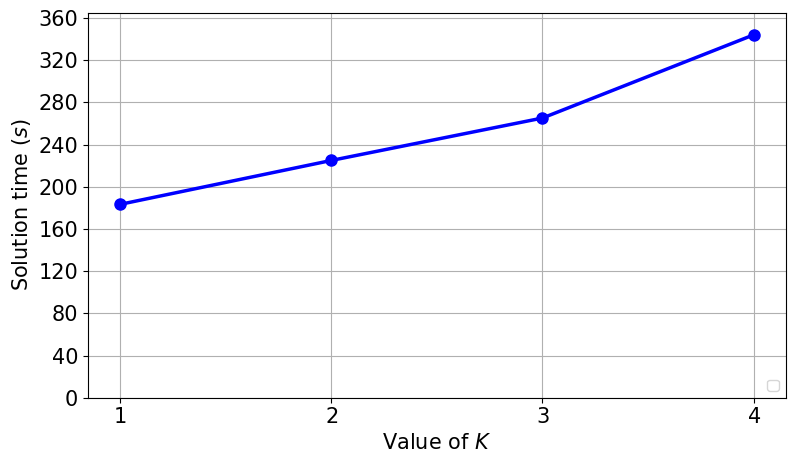

In [15]:
plt.figure(figsize=(9,5)); plt.figure(1)
method = ['$1$', '$2$', '$3$', '$4$']
plt.ylabel("Solution time ($s$)",font2); plt.xlabel("Value of $K$",font2)
#plt.title("Computational cost regarding the choice of $K$",fontsize= 20)
plt.xticks(fontsize=s1); 
plt.ylim(175,365); plt.yticks(np.arange(0,365,40),fontsize= s1)
plt.plot(method, np.array(run_time), color = "b", linewidth=line2,  marker='o', markersize = 8); 
plt.grid(); plt.legend(fontsize=font1, loc = lo); 

### An example with the two-step method and selected highest order of derivatives

- Vehicle 1486 from the NGSIM I80 Camera 6 dataset as the example
- K = 3: bounded positions, speeds, accelerations, jerks, and minimize the sum of squared jerks

<div class="alert alert-block alert-success">
    
We selected vehicle 1486 from the NGSIM I80 camera 6 dataset, which was previously utilized as an example in \citep{coifman2017critical}, to implement our method with $K=3$. 
The results are depicted in \reff{reconstructed_traj_sample}, where the raw data are shown in yellow, the smoothed data are shown in red, and the manually re-extracted data are shown in blue.
</div>

In [16]:
def plot_example(smooth_veh_j, sample_reextract, id_num):
    font1 = 10; lo = 2; line = 3; line2 = 3; line3 = 3; s1 = 10
    font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 10,}
    y_axis = ["Position (m)", "Speed (m/s)", "Acceleration ($m/s^2$)", "Jerk ($m/s^3$)"]
    raw_id = [-13, -12, -11]; smooth_id = [-6, -5, -4]; extract_id = [11, 12, 17]
    lower_bound = [-0.5, -5.5, -8]; upper_bound = [np.max(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-6])+2, 5.5, 8]
    plt.figure(figsize=(12,7));
    plt.subplot(2,2,1)
    plt.title("Positions, speeds, accelerations, and jerks",fontsize= 25)
    plt.ylabel(y_axis[0],font2); plt.xlabel("Frame ID",font2)
    plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
    plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,3], color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
    plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,3] + smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-7]- smooth_veh_a[np.where(smooth_veh_j[:,0]==id_num[0])][:,-14], color = "r", linewidth= line2, label = "Smoothed data");
    plt.plot(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,1],sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,5] + sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,9], color = "b", linewidth=line2, label = "Manual re-extraction");
    plt.grid(); plt.legend(fontsize=font1); #plt.show() , loc = lo
   
    for i in range(1,4):
        plt.subplot(2,2,i+1)
        plt.ylabel(y_axis[i],font2); plt.xlabel("Frame ID",font2)
        plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
        plt.ylim(lower_bound[i-1],upper_bound[i-1])
        plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,raw_id[i-1]], color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
        plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,smooth_id[i-1]], color = "r", linewidth= line2, label = "Smoothed data");
        plt.plot(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,1],sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,extract_id[i-1]], color = "b", linewidth=line2, label = "Manual re-extraction");
        plt.grid(True); #plt.show()
        plt.legend([],[], frameon=False) #remove the ledgend  

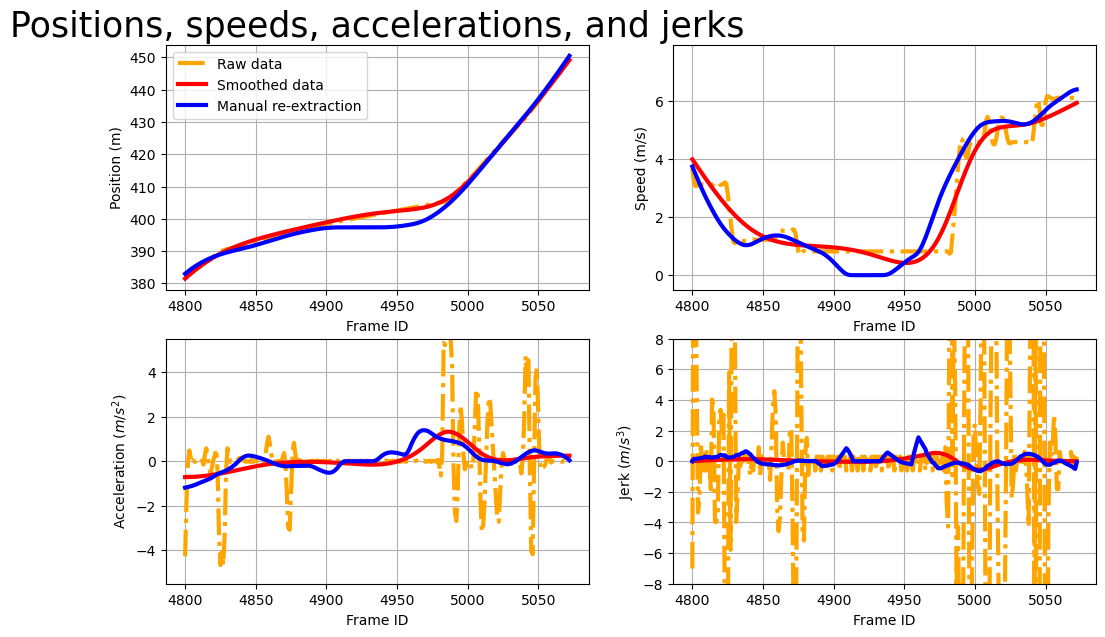

In [17]:
id_car=1486;id_num=[id_car,1478];plot_example(smooth_veh_j,sample_reextract,id_num)

In [18]:
def displaySpectrum_smooth(data_j, data_reextract, data_id): #data_id = 1 for ngsim, data = 2 for highd
    import copy; from scipy.fftpack import fft
    from scipy import fftpack, arange; import matplotlib.pyplot as plt
    from pylab import plot, show, title, xlabel, ylabel, subplot
    N = len(data_j); duration = N*0.1; dt = 0.1 #duration and sampling step(s)
    fs = 1/dt; #sampling frequency

    hat_a_hz = fft(data_j[:,-12],N); hat_j_hz = fft(data_j[:,-11],N); #raw data
    ja_hz = fft(data_j[:,-5],N); jj_hz = fft(data_j[:,-4],N); #Our method
    reex_a_hz = fft(data_reextract[:,-6],N); reex_j_hz = fft(data_reextract[:,-1],N)
    frq = np.linspace(0, fs, N)
    raw_a = 2*(np.absolute(hat_a_hz))/N; raw_j = 2*(np.absolute(hat_j_hz))/N;  
    mag_ja = 2*(np.absolute(ja_hz))/N; mag_jj = 2*(np.absolute(jj_hz))/N;
    mag_reex_a = 2*(np.absolute(reex_a_hz))/N; mag_reex_j = 2*(np.absolute(reex_j_hz))/N
    
    s1 = 15; font2 = {'weight' : 'normal', 'size' : 15,}; 
    plt.figure(figsize=(18,5)); plt.xticks(np.arange(0, 5.5, 0.5)) #plt.xlim(0,100)
    plt.subplot(1,2,1) 
    plt.title("Frequency spectrum (sample trajectory)",fontsize= 30)
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_a[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    plt.plot(frq[:len(frq) // 2], mag_ja[:len(frq) // 2], color = "r", linewidth=3, label = "Smoothed data"); 
    if data_id == 1:
        plt.plot(frq[:len(frq) // 2],mag_reex_a[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration"); 
    plt.grid(True); plt.legend(fontsize=10, loc = 1); #plt.show()

    plt.subplot(1,2,2) 
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_j[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    plt.plot(frq[:len(frq) // 2], mag_jj[:len(frq) // 2], color = "r", linewidth=3, label = "Smoothed data"); 
    if data_id == 1:
        plt.plot(frq[:len(frq) // 2],mag_reex_j[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration"); 
    plt.grid(True); 

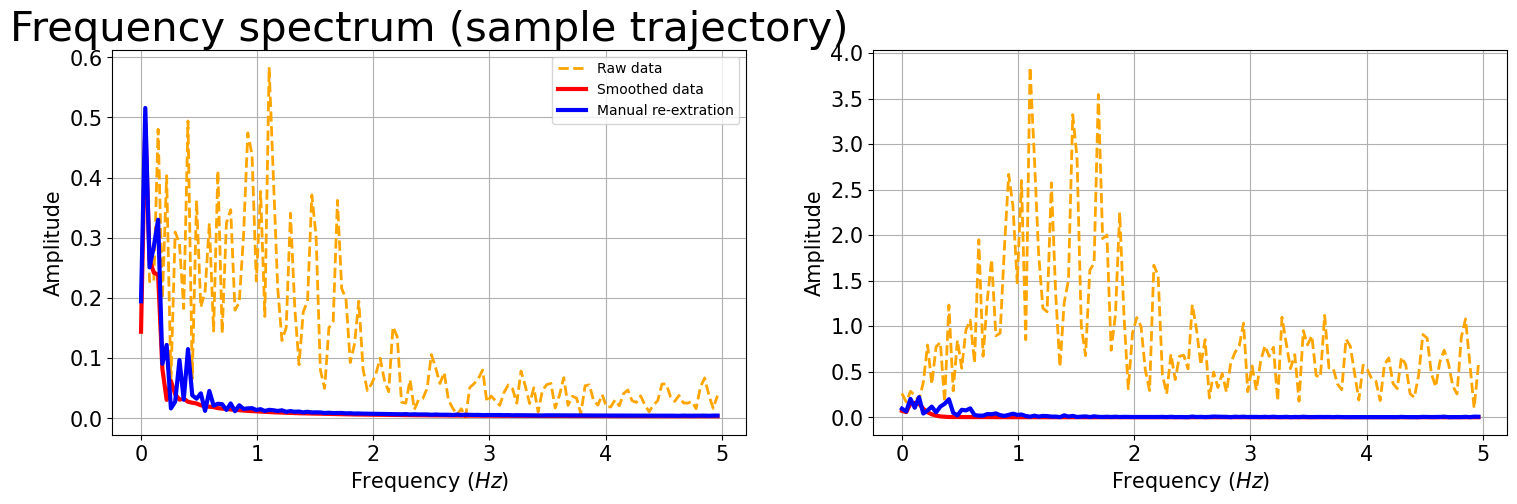

In [19]:
displaySpectrum_smooth(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])], sample_reextract[np.where(sample_reextract[:,0] == id_num[0])], data_id = 1)

## Comparison with an existing method with respect to manually re-extracted data
<table>
    <tr>
        <td colspan="2">Variables</td>
        <td>Raw data </td>
        <td>Multistep optimization </td>
        <td>Our method </td>
        <td>Manual re-extraction </td>
    </tr>
    <tr>
        <td rowspan="3">Position ($m$)</td>
        <td>Mean (position residuals) </td>
        <td> / </td>
        <td> -0.04 </td>
        <td> 0 </td>
        <td> 0.12 </td>
    </tr>
    <tr>
        <td> Std (position residuals) </td>
        <td> / </td>
        <td> 0.88 </td>
        <td> 0.38 </td>
        <td> 1.38 </td>
    </tr>
    <tr>
        <td> $E((\tilde{\textbf{x}}-\textbf{x}^*)^2)$ ($m^2$) </td>
        <td> 1.91 </td>
        <td> 2.18 </td>
        <td> 1.87 </td>
        <td> / </td>
    </tr>
    <tr>
        <td rowspan="5">Speed($m/s$)</td>
        <td> Mean </td>
        <td>8.07 </td>
        <td>8.05 </td>
        <td>8.04 </td>
        <td>7.88 </td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 4.07</td>
        <td> 4.01</td>
        <td> 3.99</td>
        <td> 3.89</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [0,36.0]</td>
        <td>[0,27.0]</td>
        <td> [0,27.2]</td>
        <td> [0,26.4]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
    </tr>
    <tr>
        <td>$E((\tilde{\textbf{x}}^{(1)}-\textbf{x}^{(1)*})^2)$</td>
        <td>0.88 </td>
        <td>0.47 </td>
        <td>0.32 </td>
        <td>/ </td>
    </tr>
    <tr>
        <td rowspan="5">Acceleration ($m/s^2$)</td>
        <td> Mean </td>
        <td> -0.04</td>
        <td> -0.04</td>
        <td> -0.03</td>
        <td> 0.03</td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 6.69</td>
        <td> 0.92</td>
        <td> 0.6</td>
        <td> 0.58</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [-176.5,292.2]</td>
        <td> [-14.1,4.5]</td>
        <td> [-4.8,4.0]</td>
        <td> [-4.2,3.5]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td> 15.0</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
    </tr>
    <tr>
        <td>$E((\tilde{\textbf{x}}^{(2)}-\textbf{x}^{(2)*})^2)$</td>
        <td> 44.56</td>
        <td> 0.68</td>
        <td> 0.25</td>
        <td> \</td>
    </tr>
    <tr>
        <td rowspan="5">Jerk ($m/s^3$)</td>
        <td> Mean </td>
        <td>  -0.17</td>
        <td>-0.13  </td>
        <td> -0.02</td>
        <td> -0.02</td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 99.80</td>
        <td> 2.41</td>
        <td> 0.59</td>
        <td> 0.62</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [-4171.5,2954.4]</td>
        <td> [-141.0,39.4]</td>
        <td> [-8.0,8.0]</td>
        <td> [-5.3,7.1]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td>42.3 </td>
        <td>  0.6</td>
        <td>0 </td>
        <td> 0</td>
    </tr>
    <tr>
        <td>$E((\tilde{\textbf{x}}^{(3)}-\textbf{x}^{(3)*})^2)$</td>
        <td> 9960.09</td>
        <td> 5.9</td>
        <td> 0.63</td>
        <td> / </td>
    </tr>
</table>

<div class="alert alert-block alert-success">
    
We still adopt the manually re-extracted data from \citep{coifman2017critical} for comparison (referred to as "manual re-extraction" hereafter).
The trajectories smoothed by the multistep optimization method in \citep{montanino2015trajectory} have also been released, which provide a great source of comparative data. We adopt them (referred to as "multistep optimization" hereafter) for comparing with the trajectories smoothed by our method. 
Therefore, we have four sources of data for comparison: (1) raw data, (2) multistep optimization, (3) our method, and (4) manual re-extraction.
</div>

In [20]:
'''The result of this module corresponds to Table 4 in the paper'''
def statistic(mo_x, x1, x2): #l2_x is multistep optimization data, x1 is denoise (among which x1[:,-14:-7] are the raw data), x2 is ground truth
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    import copy
    true_data = copy.deepcopy(x2)
    true_data[:,5] = true_data[:,5] + true_data[:,9]
    derivatives = ["position     ", "speed        ","acceleration ","jerk         "]
    ground_truth_id = [5, -7, -6, -1] #  column number of position, speed, acceleration, jerk in the ground truth data
    multistep_id = [3, 4, 5, -1] #  column number of position, speed, acceleration, jerk in the multistep optimization data
    up = [200, 30, 4, 8] #upper bounds of derivatives of positions
    low = [-200, 0, -5, -8] #lower bounds of derivatives of positions
    for i in range(4):
        true_value = true_data[:,ground_truth_id[i] ] - x1[:,3] if i == 0 else true_data[:,ground_truth_id[i] ]
        print("++++++++++++++++Raw data++++++++++++++++")
        raw = x1[:,-14+i] - x1[:,-14] if i == 0 else x1[:,-14+i] #data smoothed by multistep optimization method
        mse_test0 = mean_squared_error(raw, true_value) #mean squared error between the multistep optimiztaion smoothed data and ground truth
        mean_x0 = round(np.mean(raw),2); max_x0 = round(np.max(raw),1); min_x0 = round(np.min(raw),1); std_x0 = round(np.std(raw),2)
        outlier0 = round(100*len(raw[np.where((np.round(raw[:],5) > up[i]) | (np.round(raw[:],5) < low[i]))])/len(raw),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x0, "Std: ", std_x0, "Range: [", min_x0, max_x0, "]  Outlier: ", outlier0, "mse: ", round(mse_test0,2) ); 
        print("+++++++++Multistep optimiztaion+++++++++")
        multistep_smooth = mo_x[:,multistep_id[i]] - x1[:,3] if i == 0 else mo_x[:,multistep_id[i]] #data smoothed by multistep optimization method
        mse_test1 = mean_squared_error(multistep_smooth, true_value) #mean squared error between the multistep optimiztaion smoothed data and ground truth
        mean_x1 = round(np.mean(multistep_smooth),2); max_x1 = round(np.max(multistep_smooth),1); min_x1 = round(np.min(multistep_smooth),1); std_x1 = round(np.std(multistep_smooth),2)
        outlier1 = round(100*len(multistep_smooth[np.where((np.round(multistep_smooth[:],5) > up[i]) | (np.round(multistep_smooth[:],5) < low[i]))])/len(multistep_smooth),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x1, "Std: ", std_x1, "Range: [", min_x1, max_x1, "]  Outlier: ", outlier1, "mse: ", round(mse_test1,2) ); 
        print("+++++++++++++Our method+++++++++++++++++")
        smoothed = x1[:,-7] - x1[:,-14] if i == 0 else x1[:,-7+i] #data smoothed by our method
        mse_test2 = mean_squared_error(smoothed, true_value) #mean squared error between our smoothed data and ground truth
        mean_x2 = round(np.mean(smoothed),2); max_x2 = round(np.max(smoothed),1); min_x2 = round(np.min(smoothed),1); std_x2 = round(np.std(smoothed),2)
        outlier2 = round(100*len(smoothed[np.where((np.round(smoothed[:],5) > up[i]) | (np.round(smoothed[:],5) < low[i]))])/len(smoothed),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x2, "Std: ", std_x2, "Range: [", min_x2, max_x2, "]  Outlier: ", outlier2, "mse: ", round(mse_test2,2) ); 
        print("+++++++++Manual re-extraction+++++++++++")
        rextracted = true_data[:, ground_truth_id[i]] - x1[:,3] if i == 0 else true_data[:, ground_truth_id[i]] #data smoothed by our method
        mse_test3 = mean_squared_error(rextracted, true_value) # always zero
        mean_x3 = round(np.mean(rextracted),2); max_x3 = round(np.max(rextracted),1); min_x3 = round(np.min(rextracted),1); std_x3 = round(np.std(rextracted),2)
        outlier3 = round(100*len(rextracted[np.where((np.round(rextracted[:],5) > up[i]) | (np.round(rextracted[:],5) < low[i]))])/len(rextracted),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x3, "Std: ", std_x3, "Range: [", min_x3, max_x3, "]  Outlier: ", outlier3, "mse: ", round(mse_test3,2) ); 
    
statistic(veh_multistep_pd.values, smooth_veh_j, veh_reextract_pd.values) 

++++++++++++++++Raw data++++++++++++++++
derivative:  position      Mean:  0.0 Std:  0.0 Range: [ 0.0 0.0 ]  Outlier:  0.0 mse:  1.91
+++++++++Multistep optimiztaion+++++++++
derivative:  position      Mean:  -0.04 Std:  0.88 Range: [ -56.6 9.9 ]  Outlier:  0.0 mse:  2.18
+++++++++++++Our method+++++++++++++++++
derivative:  position      Mean:  -0.0 Std:  0.38 Range: [ -1.6 2.4 ]  Outlier:  0.0 mse:  1.87
+++++++++Manual re-extraction+++++++++++
derivative:  position      Mean:  0.12 Std:  1.38 Range: [ -11.9 10.5 ]  Outlier:  0.0 mse:  0.0
++++++++++++++++Raw data++++++++++++++++
derivative:  speed         Mean:  8.07 Std:  4.07 Range: [ 0.0 36.0 ]  Outlier:  0.0 mse:  0.88
+++++++++Multistep optimiztaion+++++++++
derivative:  speed         Mean:  8.05 Std:  4.01 Range: [ 0.0 27.0 ]  Outlier:  0.0 mse:  0.47
+++++++++++++Our method+++++++++++++++++
derivative:  speed         Mean:  8.04 Std:  3.99 Range: [ 0.0 27.2 ]  Outlier:  0.0 mse:  0.32
+++++++++Manual re-extraction+++++++++++


In [23]:
def displaySpectrum_smooth(data_qp, data_mo, data_reex, data_id): #data_id = 1 for NGSIM, data_id = 2 for highd
    import copy; from scipy.fftpack import fft
    import seaborn as sns
    from scipy import fftpack, arange; import matplotlib.pyplot as plt
    from pylab import plot, show, title, xlabel, ylabel, subplot
    if data_id == 1:
        N = len(data_qp); duration = N*0.1; dt = 0.1 #duration and sampling step(s)
    elif data_id == 2:
        N = len(data_qp); duration = N*0.04; dt = 0.04 #duration and sampling step(s)
    fs = 1/dt; #sampling frequency
    series_raw = copy.deepcopy(data_qp);  
    hat_a_hz = fft(series_raw[:,9],N); hat_j_hz = fft(series_raw[:,10],N); #raw data
    moa_hz = fft(data_mo[:,5],N); moj_hz = fft(data_mo[:,9],N) #Multistep optimization
    qpa_hz = fft(data_qp[:,-5],N); qpj_hz = fft(data_qp[:,-4],N); #Our method
    reex_a_hz = fft(data_reex[:,-6],N); reex_j_hz = fft(data_reex[:,-1],N)
    
    frq = np.linspace(0, fs, N)
    raw_a = 2*(np.absolute(hat_a_hz))/N; raw_j = 2*(np.absolute(hat_j_hz))/N; #raw data
    mag_moa = 2*(np.absolute(moa_hz))/N; mag_moj = 2*(np.absolute(moj_hz))/N; #Multistep optimization
    mag_qpa = 2*(np.absolute(qpa_hz))/N; mag_qpj = 2*(np.absolute(qpj_hz))/N; #Our method
    mag_reex_a = 2*(np.absolute(reex_a_hz))/N; mag_reex_j = 2*(np.absolute(reex_j_hz))/N
    
    s1 = 15; font2 = {'weight' : 'normal', 'size' : s1,}; 
    sns.set(rc={"figure.figsize": (9,5)}, style="white", palette=None)
    
    plt.figure(figsize=(18,5)); plt.xticks(np.arange(0, 5.5, 0.5)) #plt.xlim(0,100)
    plt.subplot(1,2,1)
    plt.title("Frequency spectrum", fontsize = 30)
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_a[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    if data_id == 1:
        plt.plot(frq[:len(frq) // 2],mag_moa[:len(frq) // 2], color = "g", linewidth=3, label = "Multistep optimization");
        plt.plot(frq[:len(frq) // 2], mag_qpa[:len(frq) // 2], color = "r", linewidth=3, label = "Our method"); 
        plt.plot(frq[:len(frq) // 2],mag_reex_a[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration"); 
    elif data_id == 2:
        plt.plot(frq[:len(frq) // 2], mag_qpa[:len(frq) // 2], color = "r", linewidth=3, label = "Smoothed data"); 
    plt.grid(True); plt.legend(fontsize=10, loc = 1); #plt.show()
    
    plt.subplot(1,2,2)
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_j[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    if data_id == 1:
        plt.plot(frq[:len(frq) // 2],mag_moj[:len(frq) // 2], color = "g", linewidth=3, label = "Multistep optimization");
        plt.plot(frq[:len(frq) // 2], mag_qpj[:len(frq) // 2], color = "r", linewidth=3, label = "Our method"); 
        plt.plot(frq[:len(frq) // 2],mag_reex_j[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration");
    elif data_id == 2:
        plt.plot(frq[:len(frq) // 2], mag_qpj[:len(frq) // 2], color = "r", linewidth=3, label = "Smoothed data"); 
    plt.grid(True); 

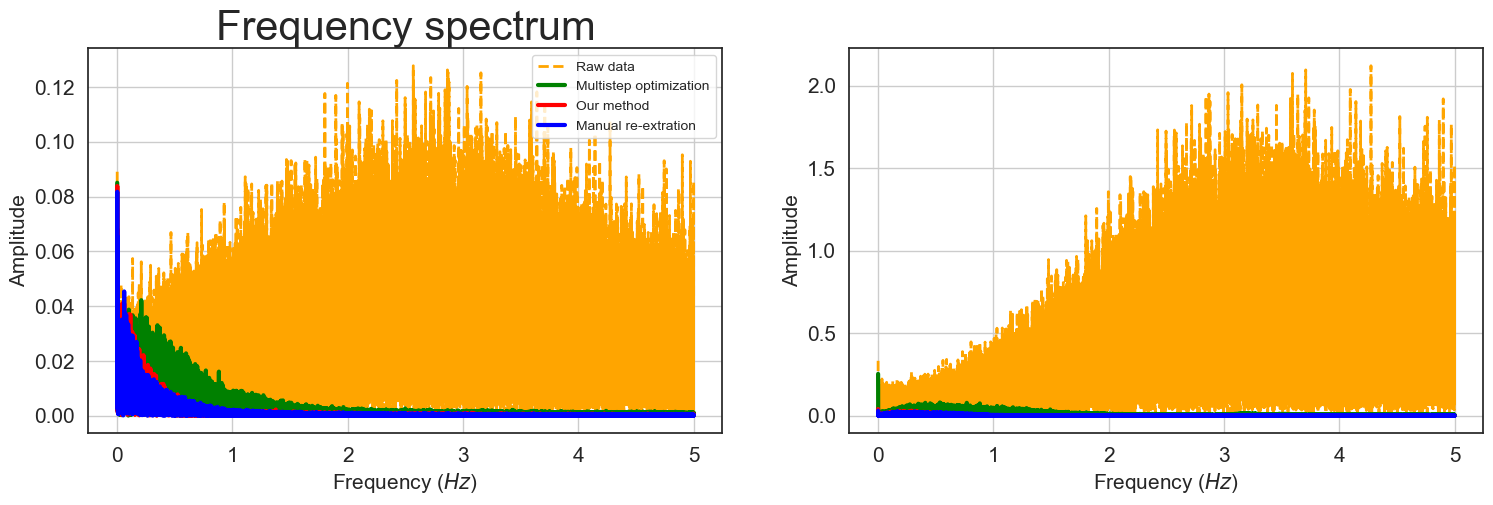

In [24]:
displaySpectrum_smooth(smooth_veh_j, veh_multistep_pd.values, veh_reextract_pd.values, data_id = 1)

In [25]:
#recalculate the positions
smooth_veh_j[:,3] = smooth_veh_j[:,3] + smooth_veh_j[:, -7] - smooth_veh_j[:,-14]

In [26]:
processed_data = pd.DataFrame(smooth_veh_j[:, [0,1,2,3,4,5,6,-6,-5,-4]])
processed_data.columns =  ['Vehicle_ID','Frame_ID','Global_Time','Local_Y','v_Length', 'Preceding','Following', "speed","acceleration","jerk"]
processed_data

,Vehicle_ID,Frame_ID,Global_Time,Local_Y,v_Length,Preceding,Following,speed,acceleration,jerk
0,1.000,746.000,5.000,384.896,4.359,0.000,11.000,6.262,0.350,0.129
1,1.000,747.000,5.100,385.526,4.359,0.000,11.000,6.297,0.361,0.107
2,1.000,748.000,5.200,386.159,4.359,0.000,11.000,6.333,0.370,0.087
3,1.000,749.000,5.300,386.796,4.359,0.000,11.000,6.370,0.376,0.067
4,1.000,750.000,5.400,387.437,4.359,0.000,11.000,6.407,0.381,0.048
...,...,...,...,...,...,...,...,...,...,...
143612,1283.000,4131.000,12.800,444.982,4.206,0.000,1293.000,10.710,1.599,0.082
143613,1283.000,4132.000,12.900,446.069,4.206,0.000,1293.000,10.870,1.605,0.059
143614,1283.000,4133.000,13.000,447.172,4.206,0.000,1293.000,11.030,1.609,0.039
143615,1283.000,4134.000,13.100,448.291,4.206,0.000,1293.000,11.191,1.611,0.023


In [ ]:
processed_data.tocsv("smoothed_i80_camera6")

## Application to the highD dataset

- Collected via cameras carried by drones
- No speed limit on the recorded segment
- Speed range: $[0,50] m/s$; acceleration range $[-5,4] m/s^2$; jerk range $[-8,8] m/s^3$; snap range $[-12,12] m/s^4$
- Estimated accuracy $0.1 m$
- Choose vehicle 1011 as an example and then apply our method to the entire dataset

<div class="alert alert-block alert-success">
    
We also apply our method to the highD \citep{krajewski2018highd} data, newly-released vehicle trajectory data collected by drone-equipped high-resolution cameras at a segment of more than 400 meters with a prior position error of 0.1 meters. 
There is no speed limit at the study site, so we choose $[0,50]\ m/s$, a typical constraint of vehicle mechanics, as the feasible speed range. We adopt the same acceleration and jerk ranges as before.
There are 60 subsets in total, and we use the ``25-tracks" subset as an example. 
</div>

<div class="alert alert-block alert-info">
    
- This script can be adjusted to smooth highD data 
- Or the script for smoothing highD data can be accessed at [smooth_highD](https://github.com/ximeng96/Quadratic-programming-method-for-vehicle-trajectory-correcting-and-smoothing-from-noisy-data/blob/main/codes/QP_smoothing_highd.ipynb)
</div>

In [27]:
veh_traj_highd = pd.read_csv('25_tracks.csv', usecols = ['id','frame','laneId','x','width', 'precedingId','followingId'])
order = ['id','frame','laneId','x','width', 'precedingId','followingId']
veh_traj_highd = veh_traj_highd[order]

#add 14 columns at the end, called "distance", "velocity", "acceleration", "jerk", "snap", "spacing", and "relative speed"
veh_traj_highd['distance'] = 0
veh_traj_highd['velocity'] = 0
veh_traj_highd['acceleration'] = 0 
veh_traj_highd['jerk'] = 0 
veh_traj_highd['snap'] = 0
veh_traj_highd['delta_x'] = 0
veh_traj_highd['delta_v'] = 0
veh_traj_highd['smooth_x'] = 0
veh_traj_highd['smooth_v'] = 0
veh_traj_highd['smooth_a'] = 0
veh_traj_highd['smooth_j'] = 0
veh_traj_highd['smooth_s'] = 0
veh_traj_highd['smooth_delta_x'] = 0
veh_traj_highd['smooth_delta_v'] = 0

veh_traj_highd

,id,frame,laneId,x,width,precedingId,followingId,distance,velocity,acceleration,...,snap,delta_x,delta_v,smooth_x,smooth_v,smooth_a,smooth_j,smooth_s,smooth_delta_x,smooth_delta_v
0,1,1,6,366.390,5.150,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,6,366.980,5.150,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,6,367.610,5.150,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,6,368.250,5.150,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,5,6,368.900,5.150,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019747,2850,29456,8,21.750,5.860,2845,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019748,2850,29457,8,22.220,5.860,2845,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019749,2850,29458,8,22.700,5.860,2845,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019750,2850,29459,8,23.190,5.860,2845,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
def calc_time_highd(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order,data_id):
    import time; time_list = []
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min jerk+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_j = time.time()
    smooth_veh_jerk, smooth_veh_l2j = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order,data_id)
    T2_j = time.time(); 
    time_list.append(round((T2_j - T1_j),3))
    print("time_list", time_list)

    return smooth_veh_jerk, time_list, smooth_veh_l2j
down_vel = 0; up_vel = 50; down_acc = -5; up_acc = 4; down_jerk = -8; up_jerk = 8; down_snap = -12; up_snap = 12; 
delta_t = 0.04; est_acc = 0.1; unique = 1; non_unique = 0; highest_order = 3
 
id_car = 1011
id_num = [id_car, 1005] # sample vehicle and its front vehicle
smooth_veh_highd, run_time_highd, smooth_l2_highd = calc_time_highd(veh_traj_highd, down_vel, up_vel, down_acc, up_acc, 
                                               down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order,data_id=2) #[veh_traj['id'].isin(id_num)]
pd.DataFrame(smooth_veh_highd, columns = ['id','frame','laneId','x','width', 'precedingId','followingId', 'x', 'v', 'a', 'j', 's', 'delta_x', 'delta_v', 'smooth_x', 'smooth_v', 'smooth_a', 'smooth_j', 'smooth_s', 'smooth_deltax', 'smooth_deltav'])

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min jerk+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.05234977394201237 $m$
time_list [3600.33]


,id,frame,laneId,x,width,precedingId,followingId,x,v,a,...,s,delta_x,delta_v,smooth_x,smooth_v,smooth_a,smooth_j,smooth_s,smooth_deltax,smooth_deltav
0,1.000,1.000,0.000,366.390,5.150,0.000,5.000,4.000,0.000,0.000,...,0.000,0.000,0.000,3.979,0.000,0.000,0.000,0.000,0.000,0.000
1,1.000,2.000,0.040,366.980,5.150,0.000,5.000,4.590,14.750,25.000,...,0.000,0.000,0.000,4.602,15.590,4.000,0.000,0.000,0.000,0.000
2,1.000,3.000,0.080,367.610,5.150,0.000,5.000,5.220,15.750,6.250,...,11718.750,0.000,0.000,5.232,15.750,3.680,-8.000,0.000,0.000,0.000
3,1.000,4.000,0.120,368.250,5.150,0.000,5.000,5.860,16.000,6.250,...,-3906.250,0.000,0.000,5.868,15.897,3.360,-8.000,0.000,0.000,0.000
4,1.000,5.000,0.160,368.900,5.150,0.000,5.000,6.510,16.250,0.000,...,7812.500,0.000,0.000,6.510,16.032,3.040,-8.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019747,2850.000,29456.000,1.120,21.750,5.860,2845.000,0.000,17.800,12.000,-6.250,...,0.000,0.000,0.000,17.882,12.150,-0.911,-0.052,0.862,0.000,0.000
2019748,2850.000,29457.000,1.160,22.220,5.860,2845.000,0.000,18.270,11.750,6.250,...,-7812.500,0.000,0.000,18.367,12.114,-0.911,-0.017,0.431,0.000,0.000
2019749,2850.000,29458.000,1.200,22.700,5.860,2845.000,0.000,18.750,12.000,6.250,...,-7812.500,0.000,0.000,18.850,12.077,-0.911,-0.000,0.000,0.000,0.000
2019750,2850.000,29459.000,1.240,23.190,5.860,2845.000,0.000,19.240,12.250,-6.250,...,0.000,0.000,0.000,19.332,12.041,-0.911,0.000,0.000,0.000,0.000


In [29]:
def plot_example_highd(smooth_veh_j, id_num):
    font1 = 10; lo = 2; line = 3; line2 = 3; line3 = 3; s1 = 10
    font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 10,}
    y_axis = ["Position (m)", "Speed (m/s)", "Acceleration ($m/s^2$)", "Jerk ($m/s^3$)"]
    raw_id = [-13, -12, -11]; smooth_id = [-6, -5, -4];
    lower_bound = [-0.5, -5.5, -8]; upper_bound = [np.max(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-6])+2, 5.5, 8]
    plt.figure(figsize=(12,7));
    plt.subplot(2,2,1)
    plt.title("Positions, speeds, accelerations, and jerks",fontsize= 25)
    plt.ylabel(y_axis[0],font2); plt.xlabel("Frame ID",font2)
    plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
    plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],np.abs(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,3]-smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][0,3]), color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
    plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],np.abs(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,3]-smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][0,3])+smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-7]-smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-14], color = "r", linewidth= line2, label = "Smoothed data"),
    plt.grid(); plt.legend(fontsize=font1); #plt.show() , loc = lo
   
    for i in range(1,4):
        plt.subplot(2,2,i+1)
        plt.ylabel(y_axis[i],font2); plt.xlabel("Frame ID",font2)
        plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
        plt.ylim(lower_bound[i-1],upper_bound[i-1])
        plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][2:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][2:,raw_id[i-1]], color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
        plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][2:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][2:,smooth_id[i-1]], color = "r", linewidth= line2, label = "Smoothed data");
        plt.grid(True); #plt.show()
        plt.legend([],[], frameon=False) #remove the ledgend  

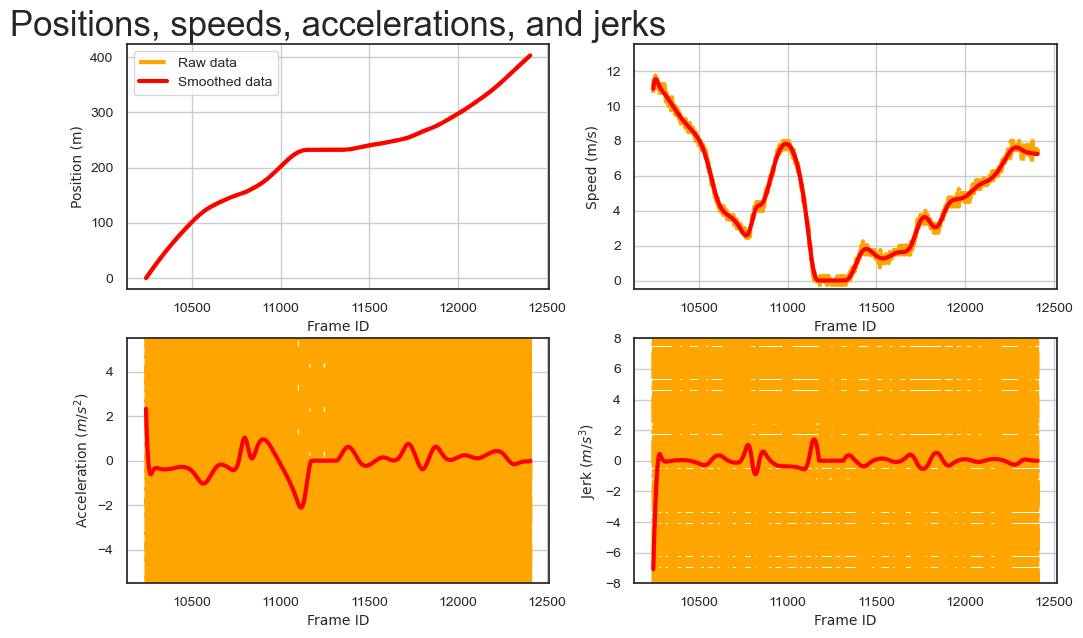

In [30]:
id_car=1011;id_num =[id_car,1005];plot_example_highd(smooth_veh_highd,id_num)

In [31]:
full_smooth, travel_len = relative(smooth_veh_highd[np.where(smooth_veh_highd[:,0]==id_num[0])], smooth_veh_highd)
for n_id in range(len([id_num[0]])):
    plt.figure(figsize=(6,3.5)); plt.tick_params(labelsize=s1); 
    plt.figure(n_id+1); plt.title("Wiedemann plot",fontsize= 20)
    plt.ylabel("Spacing ($m$)", fontsize=15); plt.xlabel("Relative speed ($m/s$)", fontsize=15)
    plt.plot(full_smooth.values[:,-8], full_smooth.values[:,-9], color = "orange", marker = 'v', markersize = 6, label = "Raw data"); #linewidth=1, linestyle='-',
    plt.plot(full_smooth.values[:,-1], full_smooth.values[:,-2], color = "r", marker = 'o', markersize = 3, label = "Smoothed data");
    plt.grid(); plt.legend(fontsize=font1)

NameError: name 'relative' is not defined

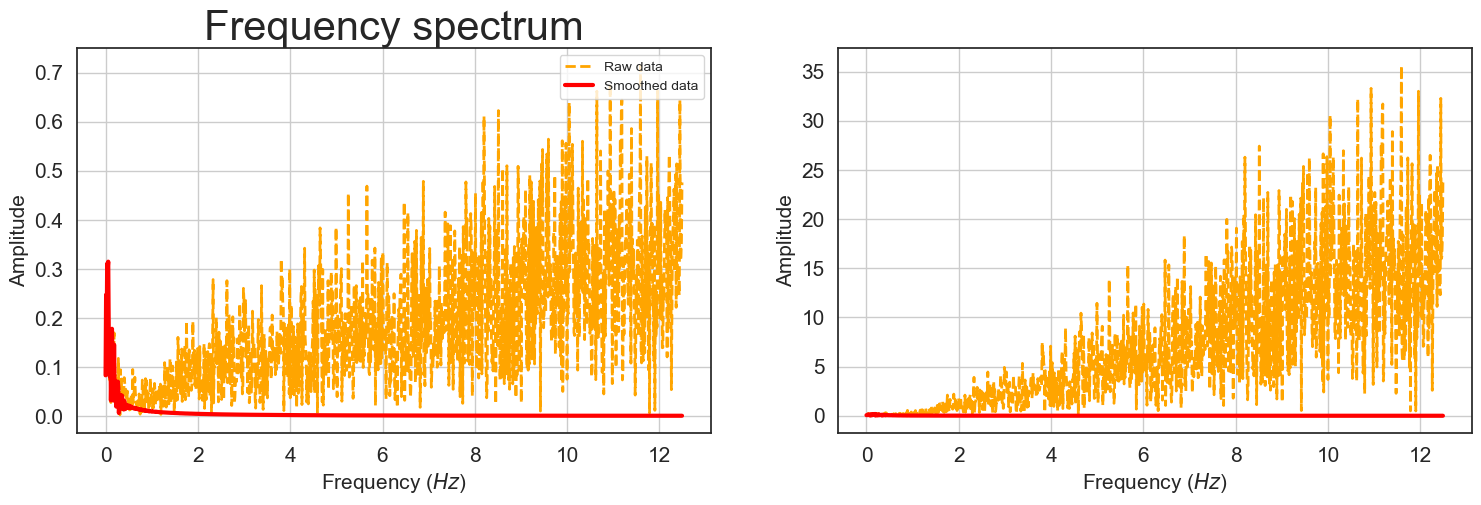

In [32]:
displaySpectrum_smooth(smooth_veh_highd[np.where(smooth_veh_highd[:,0]==id_num[0])], smooth_veh_highd[np.where(smooth_veh_highd[:,0]==id_num[0])], smooth_veh_highd[np.where(smooth_veh_highd[:,0]==id_num[0])], data_id = 2)

In [33]:
#statistic inditations
def statistic_highd(x1,x2, low, up): #x1 is denoise, x2 is raw data
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    mse_test = mean_squared_error(x2,x1) #mean squared error between the smoothed and raw data
    rmse_test = mse_test ** 0.5 #root mean squared error between the smoothed and raw data
    mae_test = mean_absolute_error(x2,x1) #mean absolute error between the smoothed and raw data
    print("mse :", round(mse_test,2), "mae :", round(mae_test,2), "absolute mean", round(np.mean(np.abs(x1)),2) ); #"rmse :",round(rmse_test,3), 
    print("+++++++++Raw data++++++++")
    mean_x = np.mean(x2); max_x = np.max(x2); min_x = np.min(x2); std_x = np.std(x2)
    print("mean :",round(mean_x,2), "range: [", round(min_x,1), round(max_x,1), "]; std :", round(std_x, 2) )
    outlier = len(x2[np.where((np.round(x2[:],5) > up) | (np.round(x2[:],5) < low))])/len(x2)
    print("outlier %", np.round(outlier*100,1))
    print("++++++Smoothed data++++++")
    mean_x = np.mean(x1); max_x = np.max(x1); min_x = np.min(x1); std_x = np.std(x1)
    print("mean :",round(mean_x,2), "range: [", round(min_x,1), round(max_x,1), "]; std :", round(std_x, 2) )
    outlier = len(x1[np.where((np.round(x1[:],5) > up) | (np.round(x1[:],5) < low))])/len(x1)
    print("outlier %", np.round(outlier*100,1))
    
print("----------------------------------position residual------------------------------------------")
statistic_highd(smooth_veh_highd[:,-7]-smooth_veh_highd[:,-14], smooth_veh_highd[:,-14]-smooth_veh_highd[:,-14], -200, 200) 
print("----------------------------------------speed------------------------------------------------")
statistic_highd(smooth_veh_highd[:,-6], smooth_veh_highd[:,-13], 0, 50) 
print("-------------------------------------acceleration--------------------------------------------")
statistic_highd(smooth_veh_highd[:,-5], smooth_veh_highd[:,-12], -5, 4) 
print("----------------------------------------jerk-------------------------------------------------")
statistic_highd(smooth_veh_highd[:,-4], smooth_veh_highd[:,-11], -8, 8) 

----------------------------------position residual------------------------------------------
mse : 0.0 mae : 0.05 absolute mean 0.05
+++++++++Raw data++++++++
mean : 0.0 range: [ 0.0 0.0 ]; std : 0.0
outlier % 0.0
++++++Smoothed data++++++
mean : 0.0 range: [ -0.9 0.8 ]; std : 0.06
outlier % 0.0
----------------------------------------speed------------------------------------------------
mse : 0.05 mae : 0.17 absolute mean 13.87
+++++++++Raw data++++++++
mean : 13.87 range: [ -6.0 35.3 ]; std : 7.7
outlier % 0.1
++++++Smoothed data++++++
mean : 13.87 range: [ -0.0 34.7 ]; std : 7.7
outlier % 0.0
-------------------------------------acceleration--------------------------------------------
mse : 41.1 mae : 4.5 absolute mean 0.36
+++++++++Raw data++++++++
mean : 0.07 range: [ -200.0 231.2 ]; std : 6.45
outlier % 57.9
++++++Smoothed data++++++
mean : 0.04 range: [ -4.6 4.0 ]; std : 0.54
outlier % 0.0
----------------------------------------jerk---------------------------------------------

<span style="color:black; font-size:150%"> Statistic summary of the raw and smoothed datasets
<table>
    <tr>
        <td colspan="2">Dataset</td>
        <td>Variables </td>
        <td>Position residual ($m$) </td>
        <td>Speed ($m/s$) </td>
        <td>Acceleration $m/s^2$ </td>
        <td>Jerk $m/s^3$ </td>
    </tr>
    <tr>
        <td rowspan="9">HighD</td>
        <td rowspan="4"> Raw data </td>
        <td> Mean </td>
        <td> / </td>
        <td> 13.87 </td>
        <td> 0.07 </td>
        <td> -0.39 </td>
    </tr>
    <tr>
        <td> Std </td>
        <td> / </td>
        <td> 7.70 </td>
        <td> 6.45 </td>
        <td> 267.76 </td>
    </tr>
    <tr>
        <td> Range </td>
        <td> / </td>
        <td> [-6.0,35.3] </td>
        <td> [-200.0, 231.2] </td>
        <td> [-7656.2,9062.5] </td>
    </tr>
    <tr>
        <td> Outliers (%)</td>
        <td> / </td>
        <td>0.1 </td>
        <td>57.9 </td>
        <td>74.2 </td>
    </tr>
    <tr>
        <td rowspan="5"> Smoothed data </td>
        <td> Mean </td>
        <td> 0</td>
        <td> 13.87</td>
        <td> 0.04</td>
        <td> -0.11</td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 0.06</td>
        <td> 7.70</td>
        <td> 0.54</td>
        <td> 0.92</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [-0.9,0.8]</td>
        <td>[0,34.7]</td>
        <td> [-4.6,4.0]</td>
        <td> [-8.0,8.0]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td> /</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
    </tr>
    <tr>
        <td> $E(|\tilde{\textbf{x}}-\textbf{x}|)$ </td>
        <td>0.05 </td>
        <td>/ </td>
        <td>/ </td>
        <td>/ </td>
    </tr>
</table>

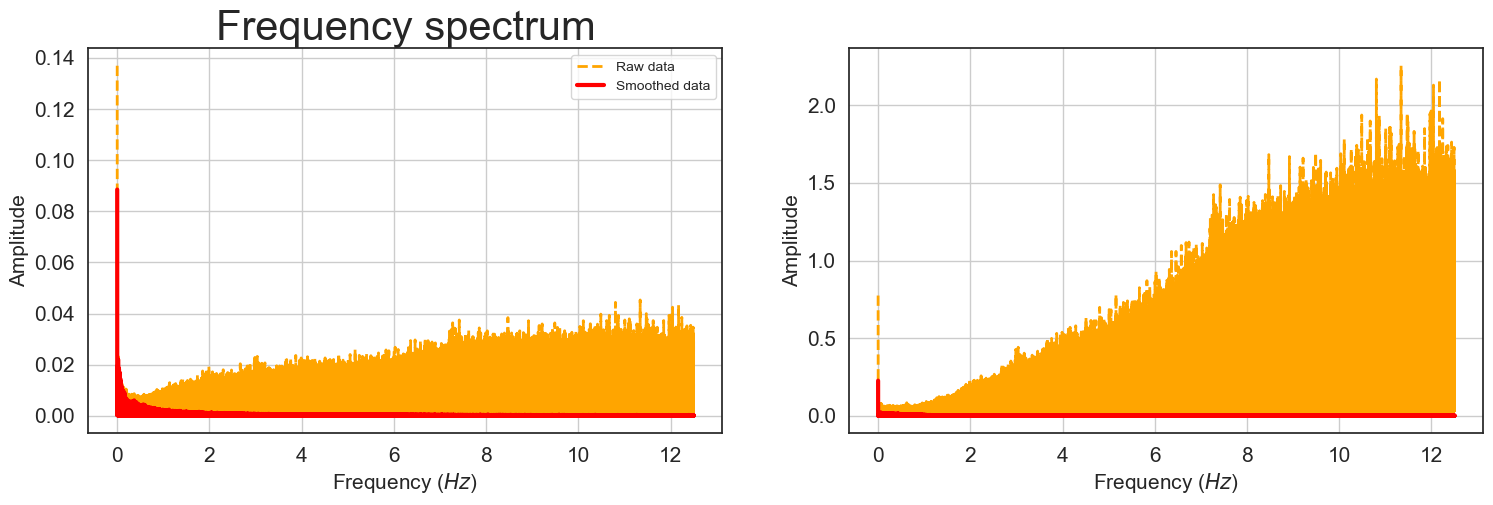

In [34]:
displaySpectrum_smooth(smooth_veh_highd, smooth_veh_highd, smooth_veh_highd, data_id = 2)

- <a href="#/1/1">1</a>. [Introduction](./Quadratic_programming.ipynb#Introduction)
- <a href="#/2/1">2</a>. [Derivatives of positions and their physically meaningful bounds](./Quadratic_programming.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [Two-step quadratic programming method](./Quadratic_programming.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties and computational complexity](./Quadratic_programming.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Quadratic_programming.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [<span style="color:red; font-size:200%"> Conclusion](./Quadratic_programming.ipynb.ipynb#Conclusion)


<div class="alert alert-block alert-info">
    
- Potential application to smooth other type of signals
    1.  Electrocardiogram (ECG) signals [reference 1](https://dl.acm.org/doi/pdf/10.1145/2093698.2093762) (Also involves a quadratic programming problem) 
    2.  Bioelectrical signals [reference 1](https://www.sciencedirect.com/science/article/pii/S0165168413004696)
    4.  Articulatory trajectory (relates to speech signals) [reference 1](https://www.sciencedirect.com/science/article/pii/S0095447019307776) (One of the earliest one to detect the articulatory trajectory, but just use linear smoothing algorithm);
    5. CT images [reference 1](https://iopscience.iop.org/article/10.1088/0031-9155/60/21/8437/pdf) (Also involves iterations)
</div>

# Conclusion
- Summary
    - Elements that are considered
        - Discrepancy
        - Roughness
        - Bounded derivatives of positions
        - Prior position errors
    - Methodology
        - Step 1: minimization of the discrepancy between the half-smoothed and raw positions 
        - Step 2: minimization of the sum of squared highest order derivatives
    - Properties
        - Always yield unique optimal solutions
    - Numerical applications
        - Effectively remove outliers and high-frequency noises
        - Outperform the existing method 
        - Closely resemble those manually re-extracted data

- Contribution
    - Define speeds and higher order derivatives as symplectic differences in positions and discuss the properties of resulted difference matrices, form the foundation of the ensuing formulation of our method
    - Introduce a novel method to effectively smooth longitudinal vehicle trajectory data
    - Theoretically prove the existence and uniqueness of solutions
    - Demonstrate that a highest order of three yields an efficient method and smoothed trajectories comparable to manually re-extracted ones
- Future extension
    - Incorporating the equality constraints using moments into our method
    - Smooth longitudinal trajectories obtained from other sources
    - Smooth lateral vehicle trajectories
    - Trajectory imputation (handle trajectories with missing values)
    - Trajectory planning and design

<div class="alert alert-block alert-success">
    
In this study, we proposed a two-step quadratic programming method for smoothing longitudinal vehicle trajectory data. 
In the first step, we minimize the discrepancy between the half-smoothed and raw positions, while adhering to physically meaningful bounds on the speeds and higher order derivatives of the half-smoothed positions.
Subsequently, in the second step, our objective is to minimize the roughness of the smoothed positions, while incorporating the position ranges as additional constraints alongside those imposed in the first step. 
This step allows the smoothed positions to deviate from the raw data by at most those of the half-smoothed positions and the prior position error, and make the initial few positions in the trajectory the half-smoothed positions to ensure the strict convexity of the objective function.
We analytically proved that both quadratic programming problems always yield unique optimal solutions, guaranteeing the well-defined nature of our proposed method. This is achieved by demonstrating that,  in both steps, the domains  defined by linear inequality constraints are non-empty and that the objective functions are strictly convex.
Numerically, we employed interior point methods to solve the quadratic programming problems, with the computational complexity increasing with the number of positions and the highest order of derivatives. Using NGSIM data, we demonstrated that a highest order of three yields an efficient method and smoothed trajectories comparable to manually re-extracted ones. The results of applying our method to a sample trajectory demonstrate its effectiveness in removing outliers and high-frequency noises in higher order derivatives, with only modest adjustments to the positions. 
Additionally, we compared our method with an existing approach and show its superior performance in terms of leading to smaller MSEs between the smoothed positions, speeds, accelerations, and jerks and those manually re-extracted.
Furthermore, we applied our method to the smoothing of the recently released highD dataset, showcasing the robustness of our approach in handling trajectory data from diverse sources. Our method effectively aligns the smoothed trajectories with the vehicle characteristics and drivers' behaviors inherent in the dataset.

The contributions of this study are four fold.
Firstly, we define speeds and higher order derivatives as symplectic differences in positions, carefully discuss the properties of resulted difference matrices, and present linear inequality constraints to ensure bounded derivatives of positions. These definitions, formulations, and properties form the foundation of the ensuing formulation of a well-defined two-step quadratic programming method.
Secondly, we introduce a novel method that integrates multiple factors, including discrepancy, roughness, bounded speed and higher order derivatives, and prior position errors, to effectively smooth longitudinal vehicle trajectory data. We provide numerical evidence that demonstrates the practical applicability and effectiveness of our proposed method.
Thirdly, we offer theoretical justification for the existence and uniqueness of the optimal solutions in our method. This theoretical analysis establishes a solid foundation for the reliability and robustness of our approach, further supporting its practical implementation.
Fourthly, we demonstrate that a highest order of three yields an efficient method and smoothed trajectories comparable to manually re-extracted ones; this finding is consistent with the minimun jerk principle for human body movements \citep{flash1985coordination} and the well-established smoothing splines method by \citep{whittaker1922new}. 

In the second step, we incorporate additional equality constraints by ensuring that the initial smoothed positions match the corresponding half-smoothed positions. The number of these constraints is equal to the highest order of derivatives ($K$), guaranteeing the strict convexity of the objective function. It is worth noting that, in \citep{whittaker1922new}, additional equality constraints were introduced using $K=3$ moments. In our future research, we aim to explore the possibility of incorporating these equality constraints into our method, potentially resulting in strictly convex objective functions and comparable smoothing outcomes.

In the future, we intend to apply our method to smooth longitudinal vehicle trajectory data collected from other sources. Additionally, we aim to incorporate different boundedness criteria in the constraints to smooth lateral vehicle trajectory data. Moreover, the concepts introduced in this study open avenues for investigating scenarios involving missing portions of trajectories, requiring the imputation of missing values. We are particularly interested in predicting and planning trajectories to ensure safe, efficient, and environmentally friendly operations for both human-driven and automated vehicles. 

In our method, the prior position error functions similarly to the weight in the objective function of the smoothing splines method \citep{whittaker1922new}. Nevertheless, it is crucial to emphasize that the prior position error carries substantial physical significance within our specific context and can be directly derived from observational data. Consequently, we assert that our two-step quadratic programming method holds applicability for broader smoothing problems, encompassing situations where traditional splines methods are employed and the prior error in the raw data can be reasonably estimated or observed in advance. 
    
</div>

# Thank you


### Email: ximengf@uci.edu, wjin@uci.edu